# Letterboxd Movie Analysis Project

## Import Libraries

In [3]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


## Download the Dataset

In [5]:
pip install kaggle


Note: you may need to restart the kernel to use updated packages.


In [6]:
od.download('https://www.kaggle.com/datasets/sahilislam007/letterbox-movie-classification-dataset/data')

Skipping, found downloaded files in ".\letterbox-movie-classification-dataset" (use force=True to force download)


In [7]:
os.listdir('letterbox-movie-classification-dataset')

['Letterbox Movie Classification Dataset.csv']

## Load the Dataset

In [9]:
file_path = 'letterbox-movie-classification-dataset/Letterbox Movie Classification Dataset.csv'

# Load dataset 
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Film_title,Director,Average_rating,Genres,Runtime,Original_language,Description,Studios,Watches,List_appearances,Likes,Fans,Lowest★,Medium★★★,Highest★★★★★,Total_ratings
0,0,The Fan,Eckhart Schmidt,3.57,"['Horror', 'Drama']",92.0,German,The hero-worship that Simone has for a pop sin...,['Barbara Moorse Workshop'],12841,11032,3763,79,129,1660,714,9042
1,1,Mad Max: Fury Road,George Miller,4.18,"['Adventure', 'Science Fiction', 'Action']",121.0,English,An apocalyptic story set in the furthest reach...,"['Warner Bros. Pictures', 'Village Roadshow Pi...",2488721,331681,927538,38000,12530,158356,511140,1682389
2,2,Suspiria,Dario Argento,3.93,['Horror'],99.0,English,An American newcomer to a prestigious German b...,['Seda Spettacoli'],618171,220094,219548,13000,2814,53427,88628,443757
3,3,Lost in Translation,Sofia Coppola,3.79,"['Drama', 'Comedy', 'Romance']",102.0,English,"Two lost souls visiting Tokyo -- the young, ne...","['American Zoetrope', 'Elemental Films']",1596190,254180,493248,38000,15167,155110,193717,1076949
4,4,Akira,Katsuhiro Otomo,4.28,"['Animation', 'Action', 'Science Fiction']",124.0,Japanese,A secret military project endangers Neo-Tokyo ...,"['MBS', 'Sumitomo Corporation', 'TOHO', 'Studi...",873068,175586,341567,21000,1822,40850,196532,600721


## Data Overview & Sanity Check

In [11]:
print("Shape:", df.shape)
print("\nData Types & Null Counts:")
print(df.info())
print("\nNulls in Each Column:")
print(df.isna().sum())

print("\nDescriptive Stats:")
print(df.describe(include='all').T)


Shape: (10000, 17)

Data Types & Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   Film_title         10000 non-null  object 
 2   Director           10000 non-null  object 
 3   Average_rating     10000 non-null  float64
 4   Genres             10000 non-null  object 
 5   Runtime            10000 non-null  float64
 6   Original_language  10000 non-null  object 
 7   Description        10000 non-null  object 
 8   Studios            10000 non-null  object 
 9   Watches            10000 non-null  int64  
 10  List_appearances   10000 non-null  int64  
 11  Likes              10000 non-null  int64  
 12  Fans               10000 non-null  int64  
 13  Lowest★            10000 non-null  int64  
 14  Medium★★★          10000 non-null  int64  
 15  Highest★★★★★       10000 

## Data Cleaning

In [13]:
# Drop unnamed index column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Rename problematic columns
df.rename(columns={
    'Lowest★': 'Lowest_Rating',
    'Medium★★★': 'Medium_Rating',
    'Highest★★★★★': 'Highest_Rating'
}, inplace=True)

df.columns


Index(['Film_title', 'Director', 'Average_rating', 'Genres', 'Runtime',
       'Original_language', 'Description', 'Studios', 'Watches',
       'List_appearances', 'Likes', 'Fans', 'Lowest_Rating', 'Medium_Rating',
       'Highest_Rating', 'Total_ratings'],
      dtype='object')

**Convert Genres Column to Lists**

In [15]:
import ast

# Safer parser for genres
def safe_parse(genres):
    try:
        return ast.literal_eval(genres)
    except (ValueError, SyntaxError):
        return ['Unknown']

# Applying safe parsing
df['Genres'] = df['Genres'].apply(safe_parse)

df['Genres'].head()


0                         [Horror, Drama]
1    [Adventure, Science Fiction, Action]
2                                [Horror]
3                [Drama, Comedy, Romance]
4    [Animation, Action, Science Fiction]
Name: Genres, dtype: object

## Exploratory Data Analysis(EDA)

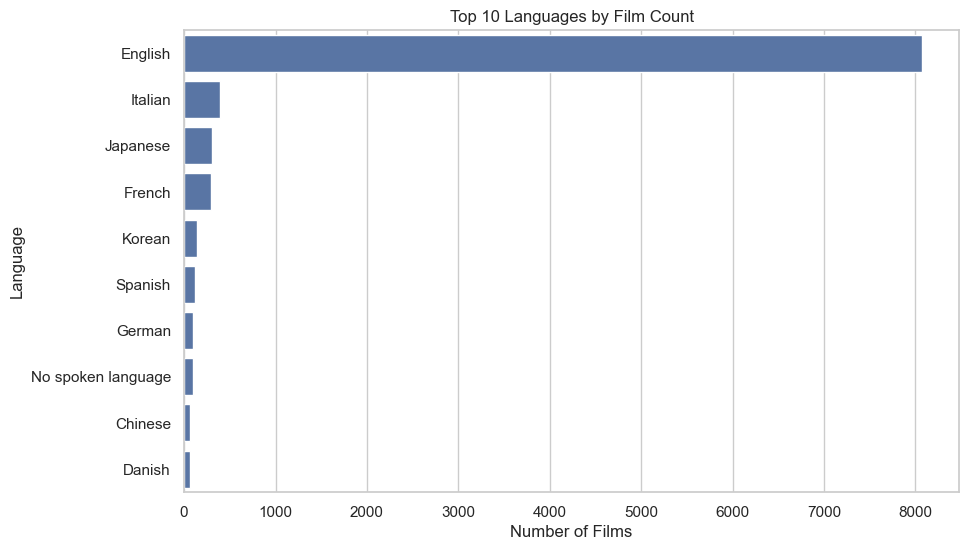

In [17]:
# Count of films by language
lang_counts = df['Original_language'].value_counts().head(10)

# Bar plot of top 10 languages
plt.figure(figsize=(10,6))
sns.barplot(x=lang_counts.values, y=lang_counts.index)
plt.title("Top 10 Languages by Film Count")
plt.xlabel("Number of Films")
plt.ylabel("Language")
plt.show()


**Most Common Genres**

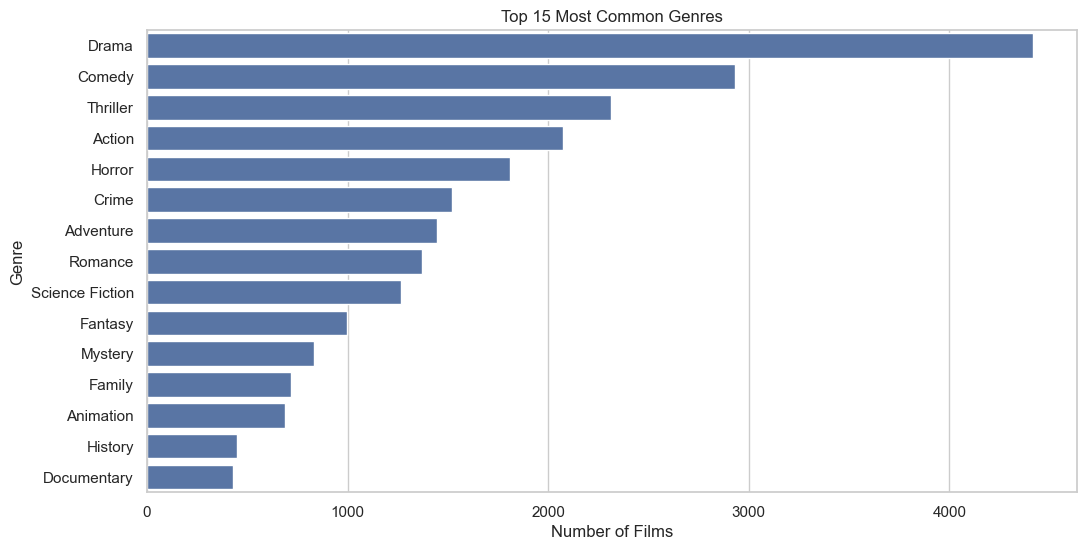

In [19]:
from collections import Counter

# Flatten all genre lists into one big list
all_genres = [genre for sublist in df['Genres'] for genre in sublist]

# Counting the frequency of each genre
genre_counts = Counter(all_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# top 15 genres
plt.figure(figsize=(12,6))
sns.barplot(data=genre_df.head(15), x='Count', y='Genre')
plt.title("Top 15 Most Common Genres")
plt.xlabel("Number of Films")
plt.ylabel("Genre")
plt.show()


**Rating Distribution and Outliers**

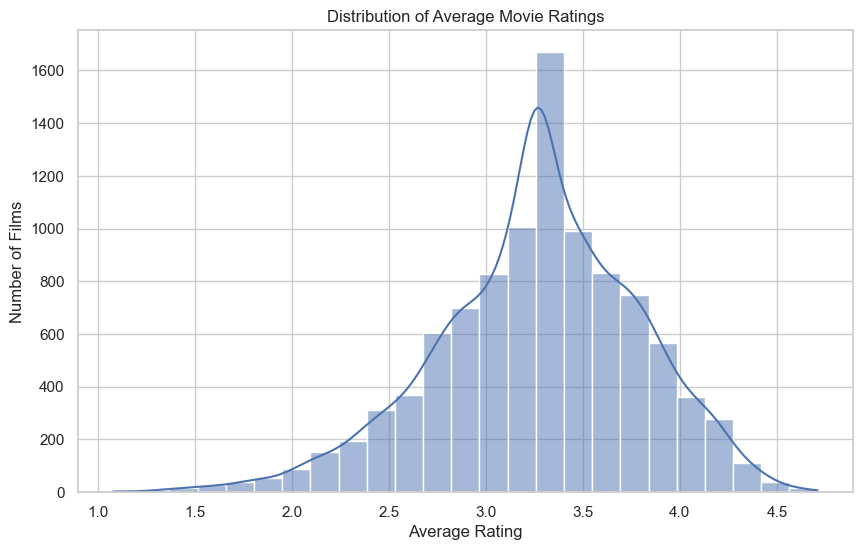

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(df['Average_rating'], bins=25, kde=True)
plt.title("Distribution of Average Movie Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Number of Films")
plt.show()


**User Engagement Overview**

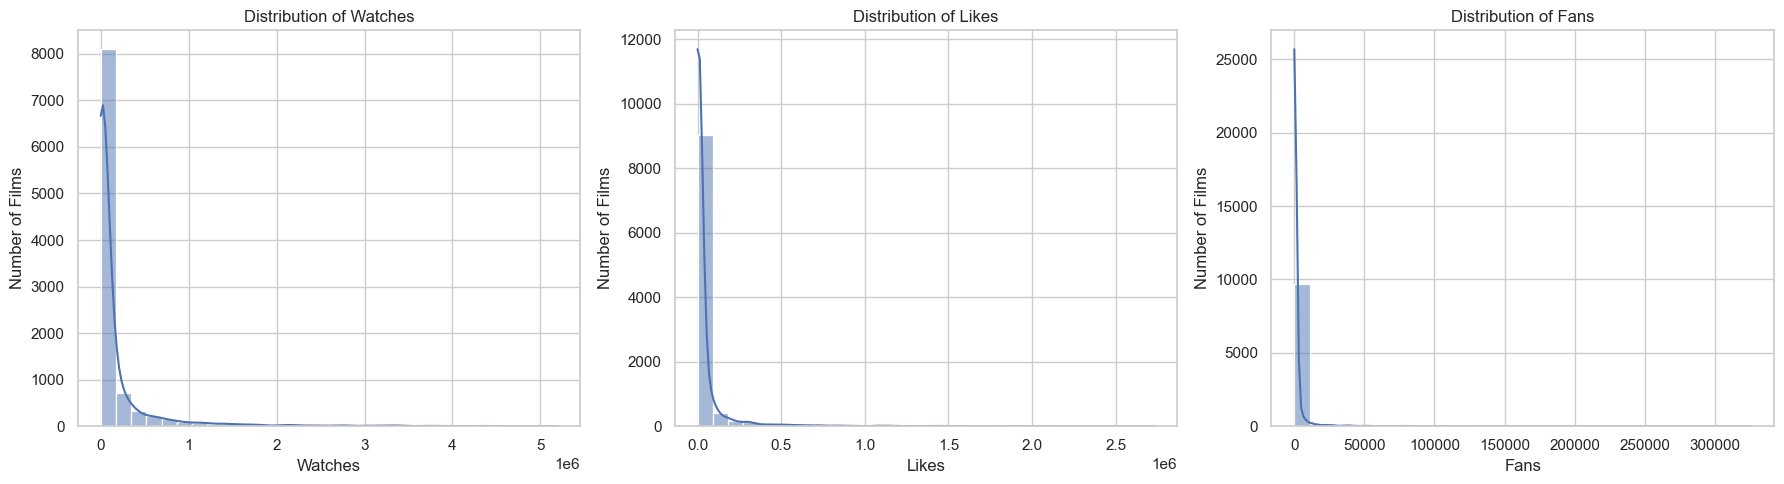

In [23]:
engagement_cols = ['Watches', 'Likes', 'Fans']

plt.figure(figsize=(18, 5))
for i, col in enumerate(engagement_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Number of Films")

plt.tight_layout()
plt.show()


**Explore Top-Performing Films by Engagement**

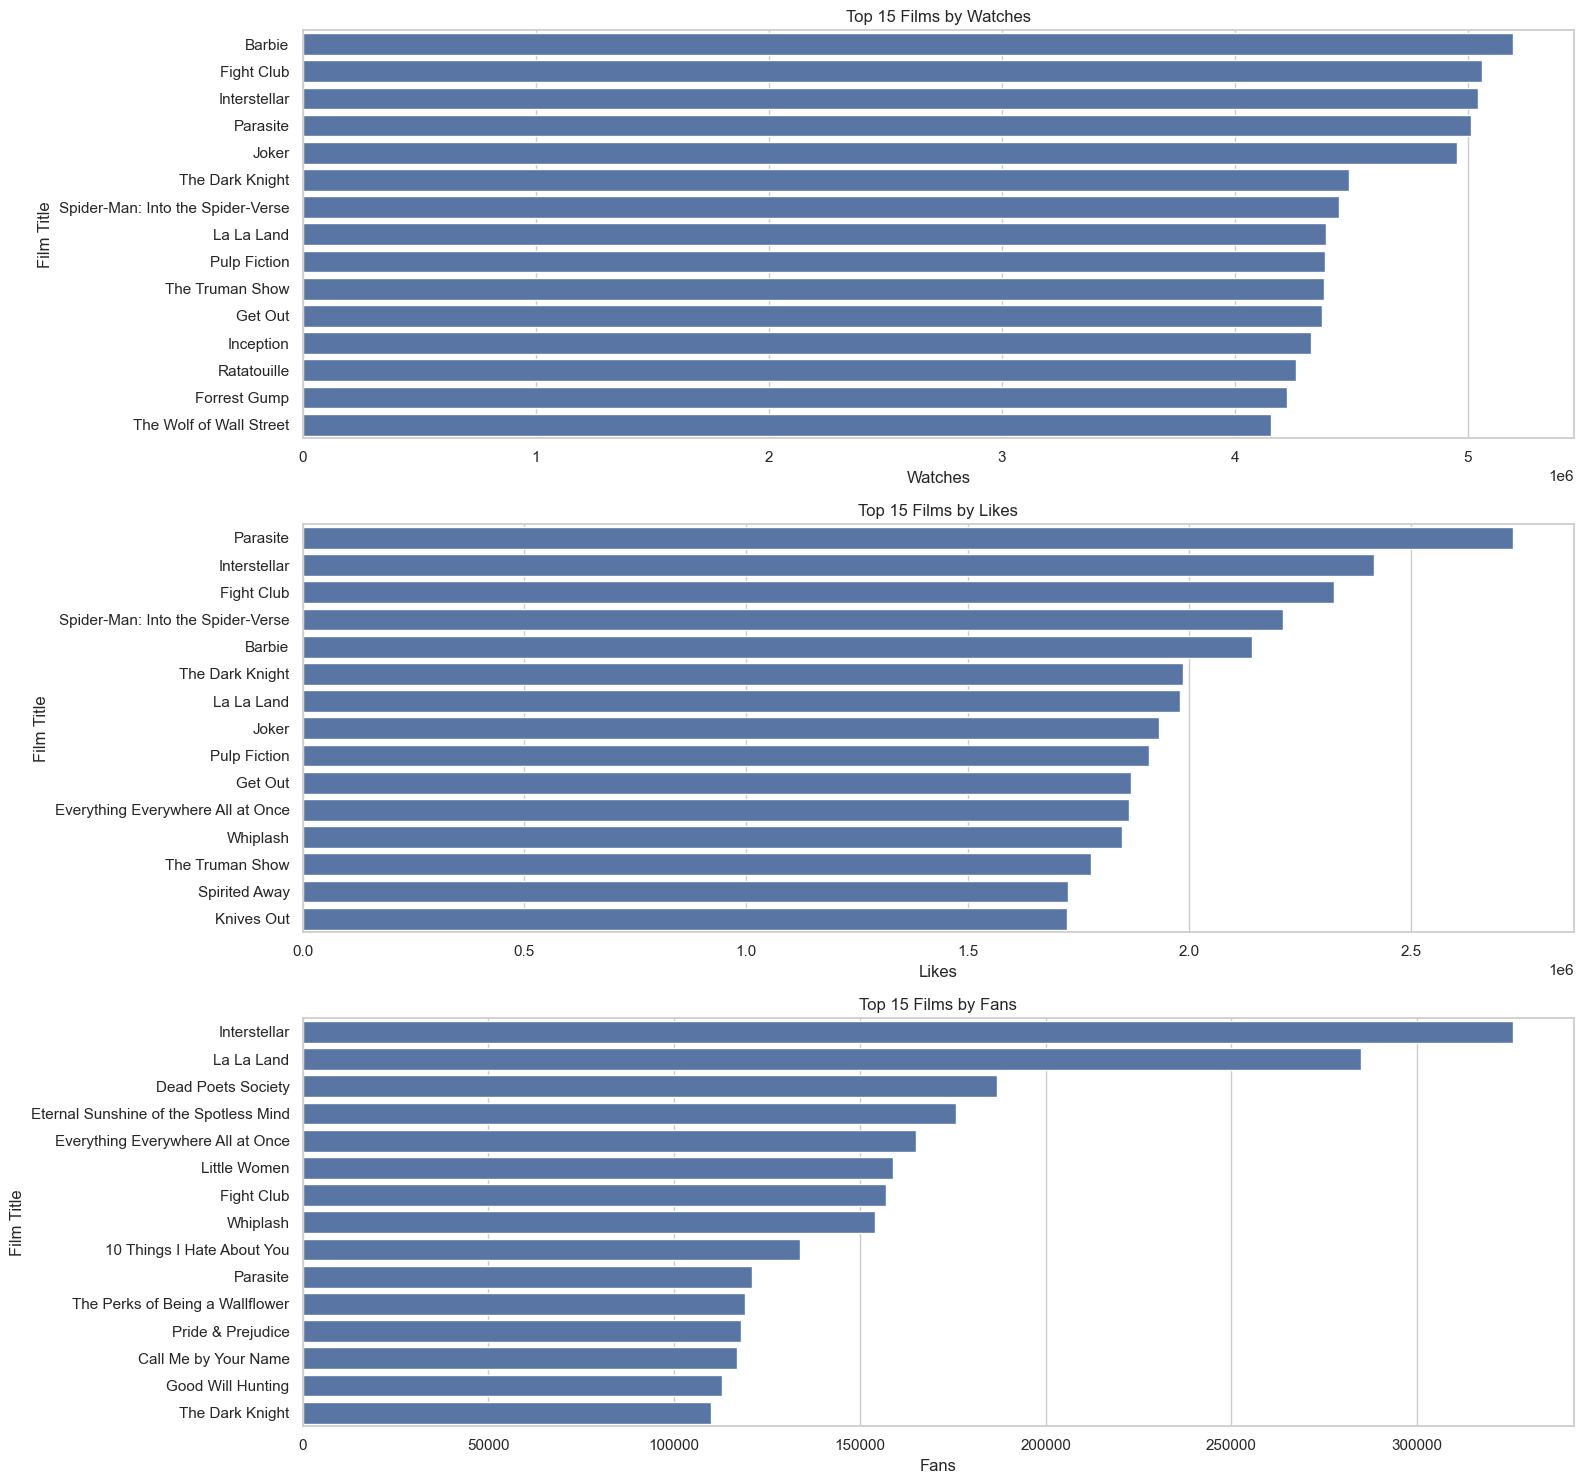

In [25]:
top_metrics = ['Watches', 'Likes', 'Fans']
plt.figure(figsize=(16, 15))

for i, col in enumerate(top_metrics):
    top_films = df[['Film_title', col]].sort_values(by=col, ascending=False).head(15)
    
    plt.subplot(3, 1, i + 1)
    sns.barplot(data=top_films, x=col, y='Film_title')
    plt.title(f"Top 15 Films by {col}")
    plt.xlabel(col)
    plt.ylabel("Film Title")

plt.tight_layout()
plt.show()


**Compare Metrics Across Genres**

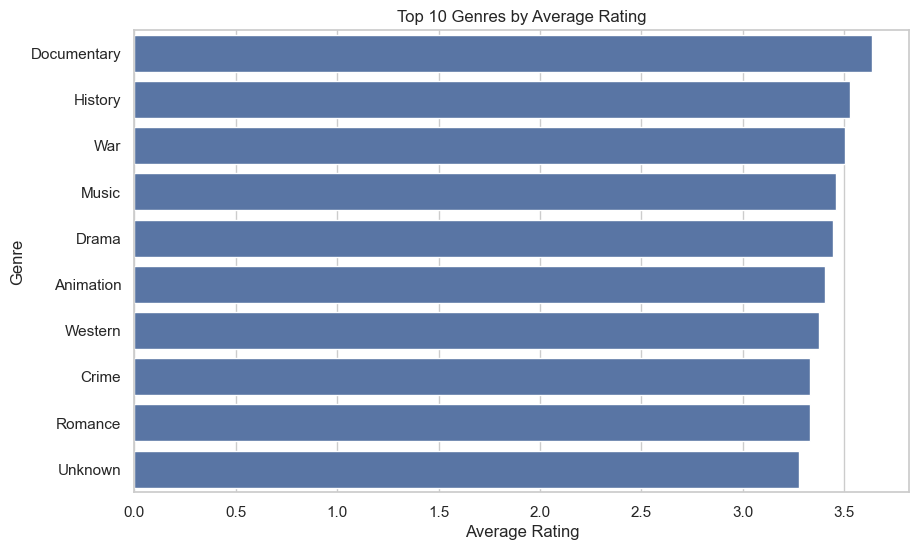

In [27]:
# Explode the Genres column to handle multi-genre films
df_exploded = df.explode('Genres')

# Group by Genre and calculate average metrics
genre_stats = df_exploded.groupby('Genres')[['Average_rating', 'Watches', 'Likes', 'Fans']].mean().sort_values('Average_rating', ascending=False)

# Top genres by average rating
top_genre_rating = genre_stats.sort_values('Average_rating', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_genre_rating, x='Average_rating', y=top_genre_rating.index)
plt.title("Top 10 Genres by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()


**Compare Genres by Popularity (Watches, Likes, Fans)**

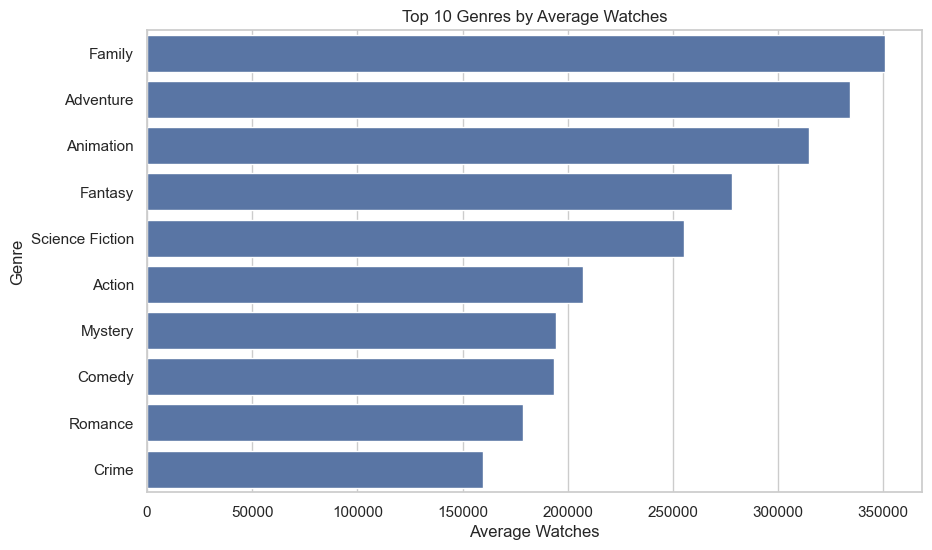

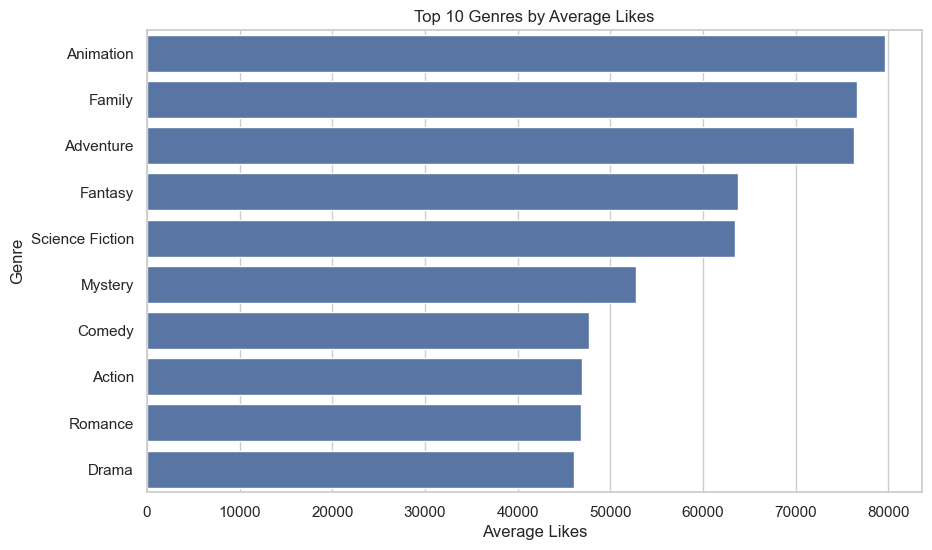

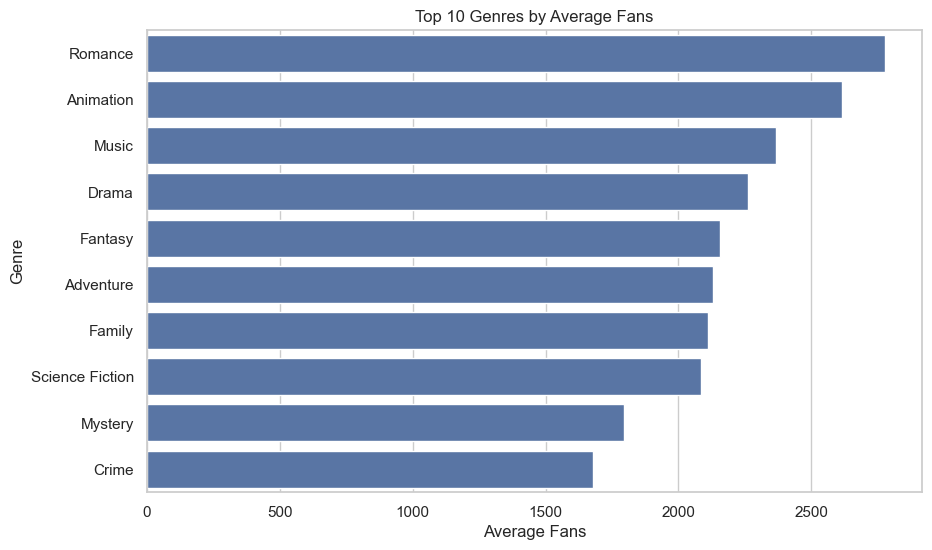

In [29]:
# Top 10 genres by number of Watches
top_genre_watches = genre_stats.sort_values('Watches', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_genre_watches, x='Watches', y=top_genre_watches.index)
plt.title("Top 10 Genres by Average Watches")
plt.xlabel("Average Watches")
plt.ylabel("Genre")
plt.show()

# Top 10 genres by Likes
top_genre_likes = genre_stats.sort_values('Likes', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_genre_likes, x='Likes', y=top_genre_likes.index)
plt.title("Top 10 Genres by Average Likes")
plt.xlabel("Average Likes")
plt.ylabel("Genre")
plt.show()

# Top 10 genres by Fans
top_genre_fans = genre_stats.sort_values('Fans', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_genre_fans, x='Fans', y=top_genre_fans.index)
plt.title("Top 10 Genres by Average Fans")
plt.xlabel("Average Fans")
plt.ylabel("Genre")
plt.show()


**Top Directors by Film Count & Ratings**

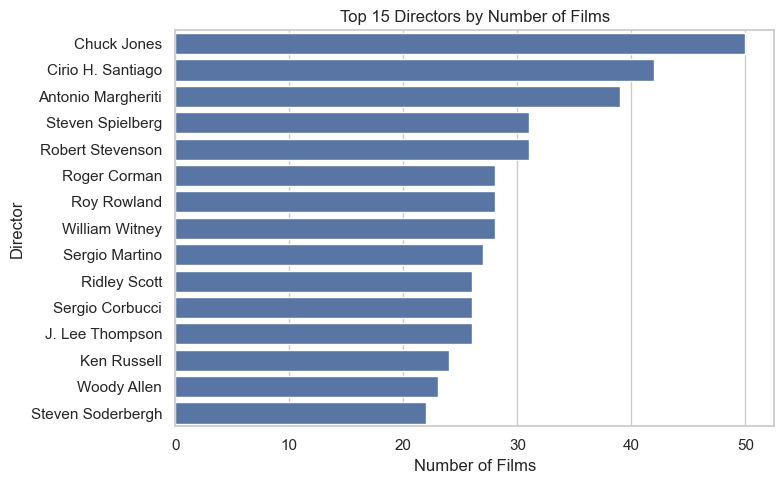

In [31]:
top_directors = df['Director'].value_counts().head(15)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top 15 Directors by Number of Films", fontsize=12)
plt.xlabel("Number of Films")
plt.ylabel("Director")
plt.tight_layout()
plt.show()


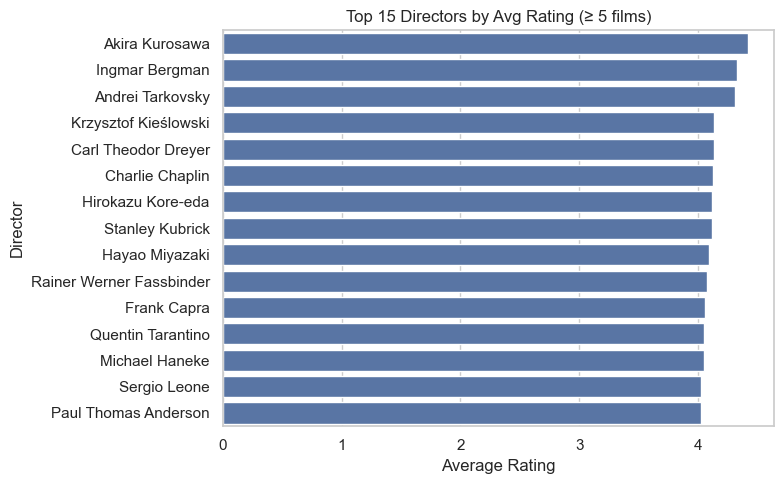

In [32]:
director_ratings = df.groupby('Director').agg({
    'Film_title': 'count',
    'Average_rating': 'mean'
}).rename(columns={'Film_title': 'Film_count'})

top_director_ratings = director_ratings[director_ratings['Film_count'] >= 5]\
    .sort_values('Average_rating', ascending=False).head(15)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_director_ratings['Average_rating'], y=top_director_ratings.index)
plt.title("Top 15 Directors by Avg Rating (≥ 5 films)", fontsize=12)
plt.xlabel("Average Rating")
plt.ylabel("Director")
plt.tight_layout()
plt.show()


**Top 15 Studios by Number of Films**

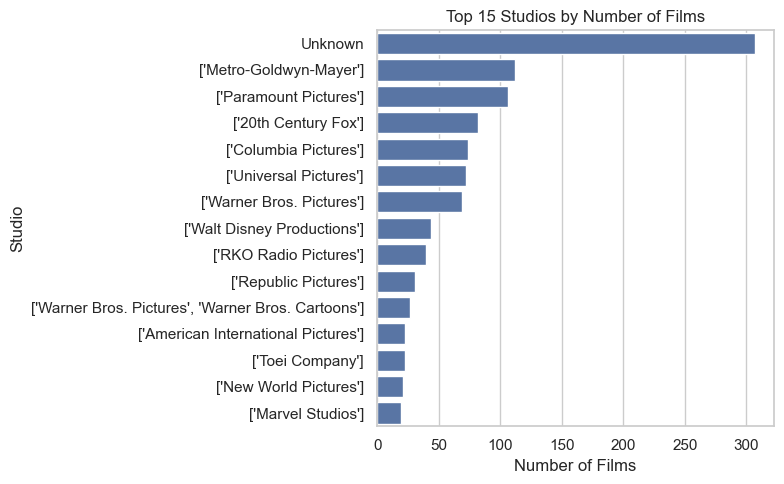

In [34]:
top_studios = df['Studios'].value_counts().head(15)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_studios.values, y=top_studios.index)
plt.title("Top 15 Studios by Number of Films", fontsize=12)
plt.xlabel("Number of Films")
plt.ylabel("Studio")
plt.tight_layout()
plt.show()


**Top 15 Studios by Average Ratings**

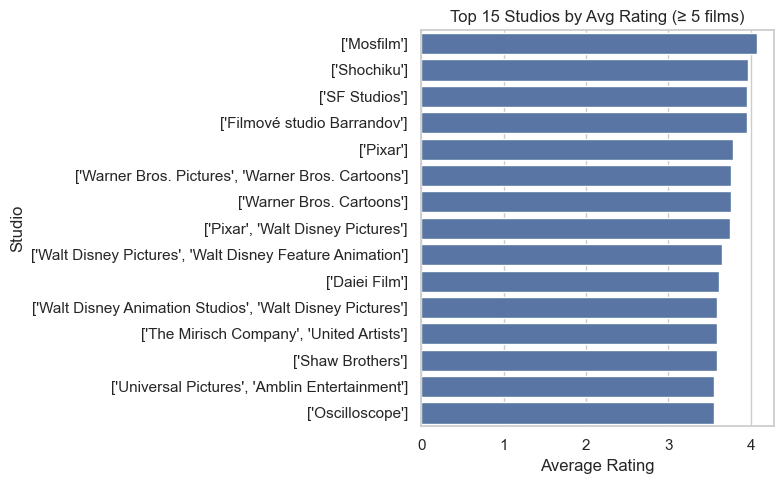

In [36]:
studio_ratings = df.groupby('Studios').agg({
    'Film_title': 'count',
    'Average_rating': 'mean'
}).rename(columns={'Film_title': 'Film_count'})

top_studio_ratings = studio_ratings[studio_ratings['Film_count'] >= 5]\
    .sort_values('Average_rating', ascending=False).head(15)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_studio_ratings['Average_rating'], y=top_studio_ratings.index)
plt.title("Top 15 Studios by Avg Rating (≥ 5 films)", fontsize=12)
plt.xlabel("Average Rating")
plt.ylabel("Studio")
plt.tight_layout()
plt.show()


**Top 10 Most Watched Films**

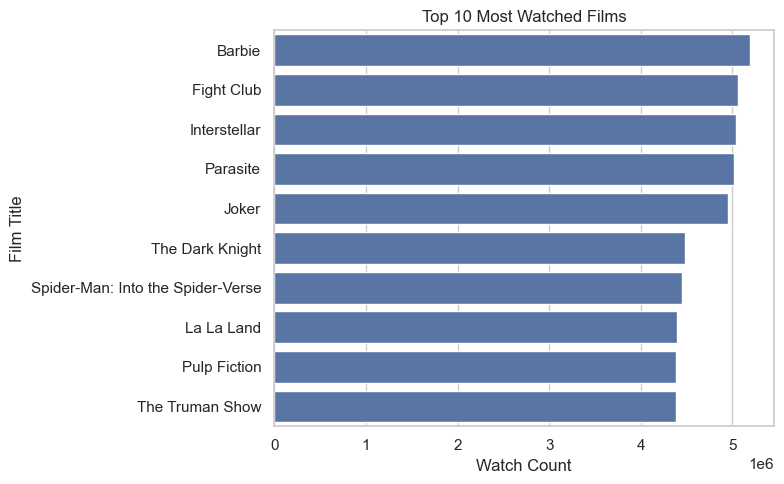

In [38]:
top_watched = df[['Film_title', 'Watches']].sort_values('Watches', ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x='Watches', y='Film_title', data=top_watched)
plt.title("Top 10 Most Watched Films", fontsize=12)
plt.xlabel("Watch Count")
plt.ylabel("Film Title")
plt.tight_layout()
plt.show()


**Top 10 Most Liked Films**

C:\Users\adity\AppData\Local\Temp\ipykernel_33400\542168234.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Likes', y='Film_title', data=top_liked, palette="Reds")


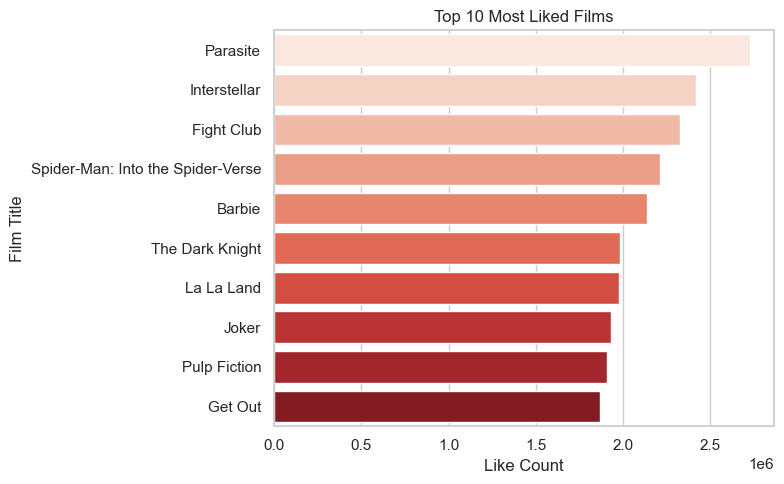

In [40]:
top_liked = df[['Film_title', 'Likes']].sort_values('Likes', ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x='Likes', y='Film_title', data=top_liked, palette="Reds")
plt.title("Top 10 Most Liked Films", fontsize=12)
plt.xlabel("Like Count")
plt.ylabel("Film Title")
plt.tight_layout()
plt.show()


**Top 10 Most Followed (Fanbase) Films**

C:\Users\adity\AppData\Local\Temp\ipykernel_33400\2748977246.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fans', y='Film_title', data=top_fans, palette="Purples")


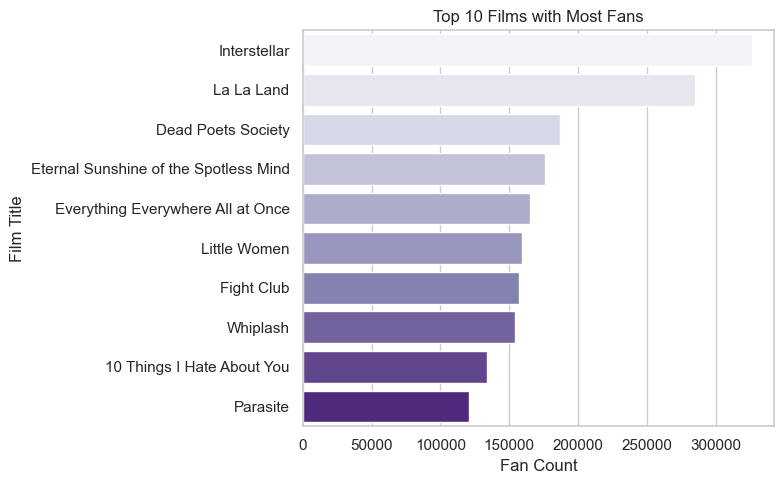

In [42]:
top_fans = df[['Film_title', 'Fans']].sort_values('Fans', ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x='Fans', y='Film_title', data=top_fans, palette="Purples")
plt.title("Top 10 Films with Most Fans", fontsize=12)
plt.xlabel("Fan Count")
plt.ylabel("Film Title")
plt.tight_layout()
plt.show()


**Rating Breakdown — Top 10 per Category**

C:\Users\adity\AppData\Local\Temp\ipykernel_33400\1101524747.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Film_title', data=top_movies, palette=pal)
C:\Users\adity\AppData\Local\Temp\ipykernel_33400\1101524747.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Film_title', data=top_movies, palette=pal)
C:\Users\adity\AppData\Local\Temp\ipykernel_33400\1101524747.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Film_title', data=top_movies, palette=pal)
C:\Users\adity\AppData\Local\Temp\ipykernel_33

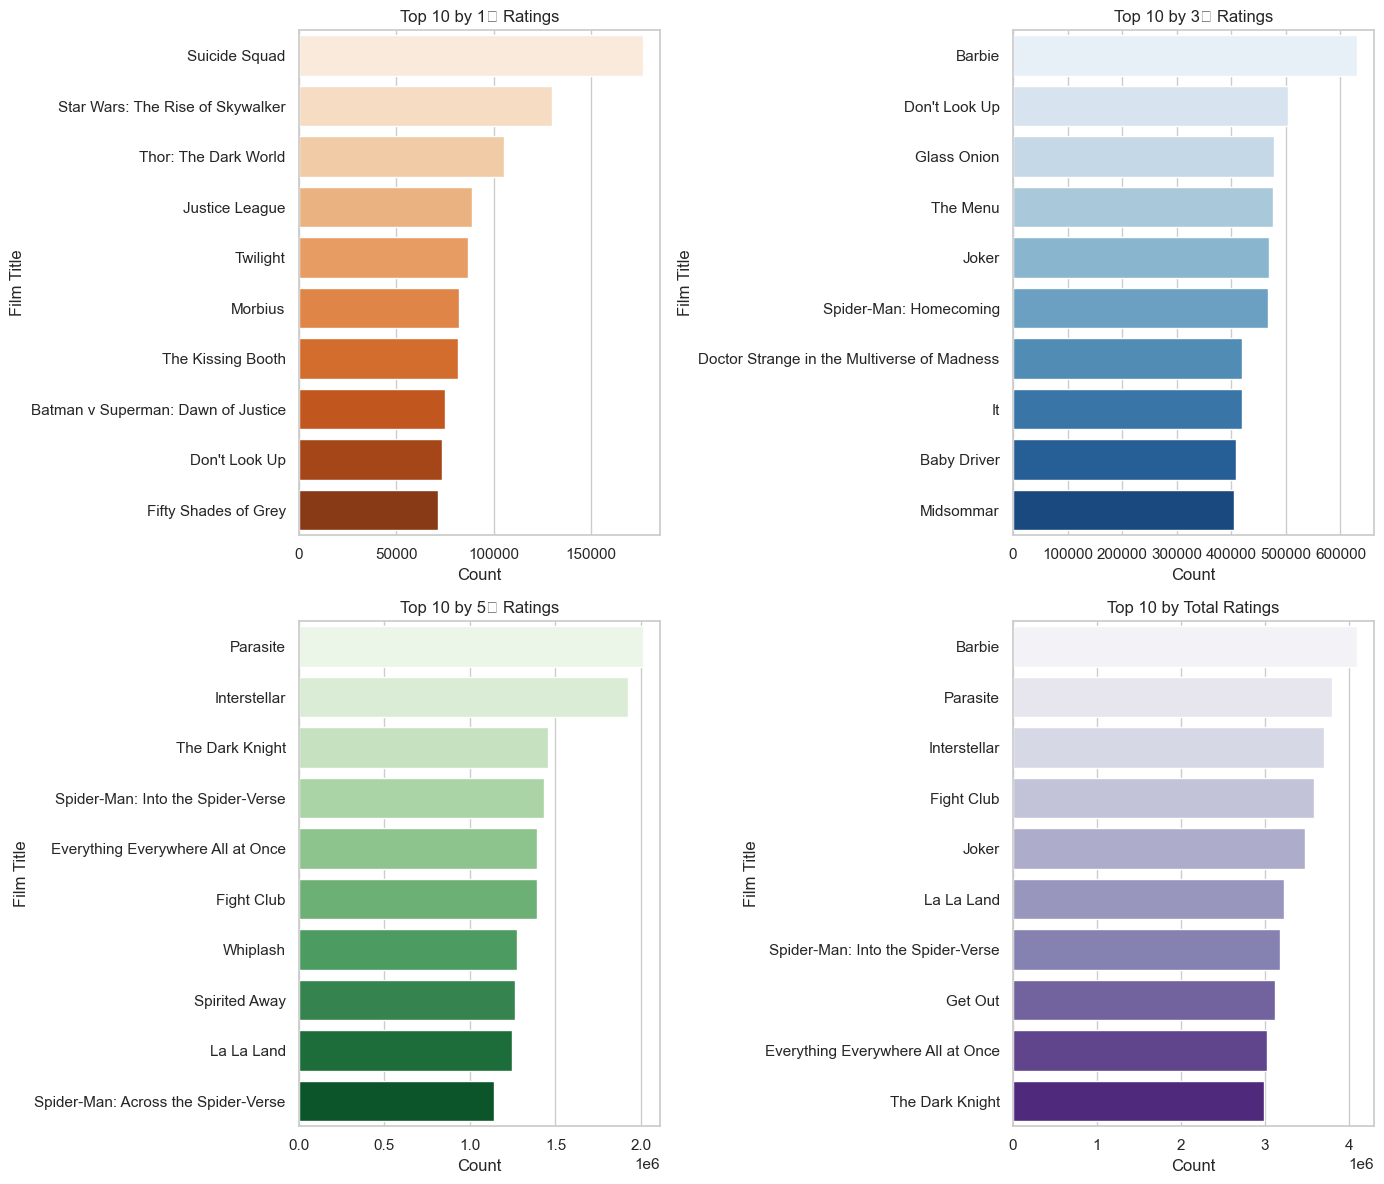

In [44]:
rating_cols = ['Lowest_Rating', 'Medium_Rating', 'Highest_Rating', 'Total_ratings']
titles = ['Top 10 by 1★ Ratings', 'Top 10 by 3★ Ratings', 
          'Top 10 by 5★ Ratings', 'Top 10 by Total Ratings']
palettes = ['Oranges', 'Blues', 'Greens', 'Purples']

plt.figure(figsize=(14, 12))

for i, (col, title, pal) in enumerate(zip(rating_cols, titles, palettes), 1):
    top_movies = df[['Film_title', col]].sort_values(col, ascending=False).head(10)
    plt.subplot(2, 2, i)
    sns.barplot(x=col, y='Film_title', data=top_movies, palette=pal)
    plt.title(title, fontsize=12)
    plt.xlabel("Count")
    plt.ylabel("Film Title")

plt.tight_layout()
plt.show()


**Original Language Distribution**

C:\Users\adity\AppData\Local\Temp\ipykernel_33400\1328403309.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_languages.values, y=top_languages.index, palette="magma")


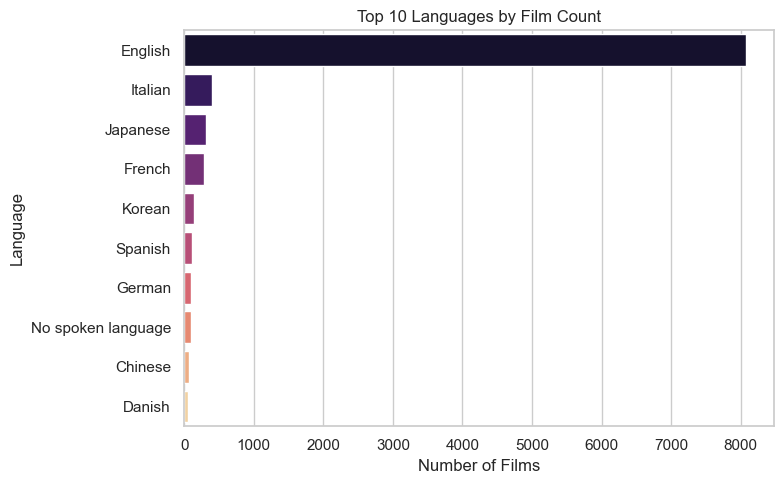

In [46]:
# Top 10 languages by film count
top_languages = df['Original_language'].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_languages.values, y=top_languages.index, palette="magma")
plt.title("Top 10 Languages by Film Count", fontsize=12)
plt.xlabel("Number of Films")
plt.ylabel("Language")
plt.tight_layout()
plt.show()


**Runtime Analysis**

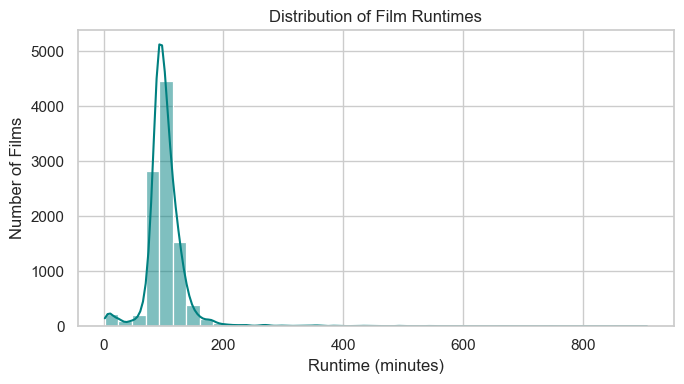

In [48]:
plt.figure(figsize=(7, 4))
sns.histplot(df['Runtime'], bins=40, kde=True, color="teal")
plt.title("Distribution of Film Runtimes", fontsize=12)
plt.xlabel("Runtime (minutes)")
plt.ylabel("Number of Films")
plt.tight_layout()
plt.show()


**Top 10 longest films**

In [50]:
# Top 10 longest films
df[['Film_title', 'Runtime']].sort_values('Runtime', ascending=False).head(10)


,Film_title,Runtime
8826,Berlin Alexanderplatz,907.0
3082,Out 1,743.0
7516,Big Little Lies,702.0
9165,"I, Claudius",669.0
4376,Brideshead Revisited,659.0
9906,Your Honor,600.0
9914,The Underground Railroad,585.0
1821,Shoah,566.0
7541,Tie Xi Qu: West of the Tracks,551.0
6193,Into the West,540.0


## Genre Analysis

**Flatten All Genres into a Single List**

In [53]:
from collections import Counter

# Flatten the list of all genres across films
all_genres = df['Genres'].explode()
genre_counts = Counter(all_genres)

# Convert to DataFrame
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by='Count', ascending=False)
genre_df.head()


,Genre,Count
1,Drama,4416
5,Comedy,2932
10,Thriller,2312
4,Action,2074
0,Horror,1812


**Visualize Top 15 Genres**

C:\Users\adity\AppData\Local\Temp\ipykernel_33400\3362505787.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df.head(15), x='Count', y='Genre', palette='cubehelix')


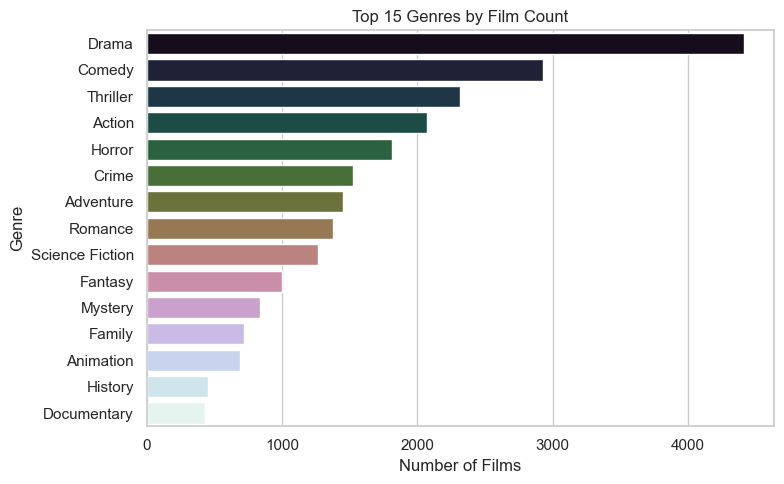

In [55]:
plt.figure(figsize=(8, 5))
sns.barplot(data=genre_df.head(15), x='Count', y='Genre', palette='cubehelix')
plt.title("Top 15 Genres by Film Count", fontsize=12)
plt.xlabel("Number of Films")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


## Correlation Heatmap (Numeric Features)

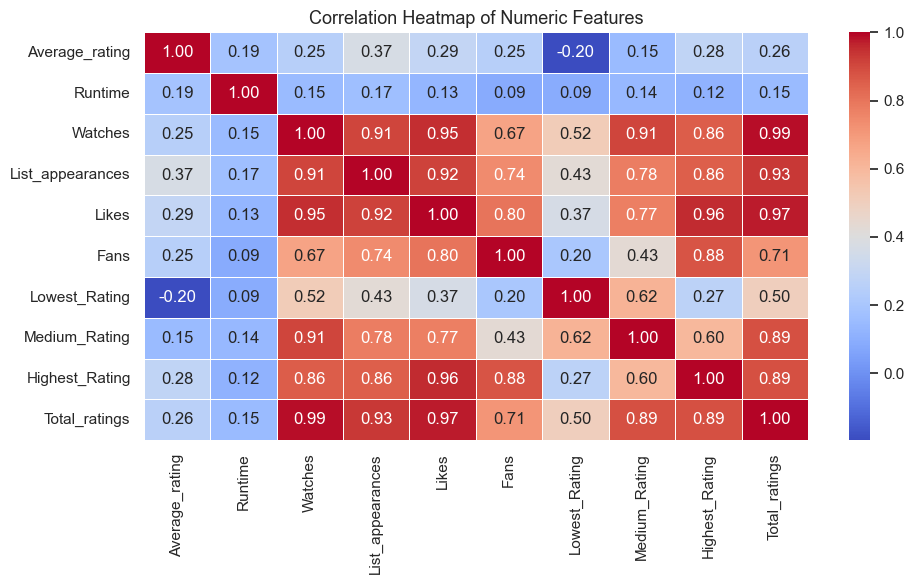

In [57]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), 
            annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=13)
plt.tight_layout()
plt.show()


## Segmenting Movies by Popularity & Quality

**Creating Segments**

In [60]:
# Defining thresholds based on percentiles
watch_threshold = df['Watches'].quantile(0.75)
rating_threshold = df['Average_rating'].quantile(0.75)

# Popularity Segment
df['Popularity_Segment'] = np.where(df['Watches'] >= watch_threshold, 'Popular', 'Unpopular')

# Quality Segment
df['Quality_Segment'] = np.where(df['Average_rating'] >= rating_threshold, 'Critically_Acclaimed', 'Poorly_Reviewed')

# Check sample
df[['Film_title', 'Watches', 'Popularity_Segment', 'Average_rating', 'Quality_Segment']].head()


,Film_title,Watches,Popularity_Segment,Average_rating,Quality_Segment
0,The Fan,12841,Unpopular,3.57,Poorly_Reviewed
1,Mad Max: Fury Road,2488721,Popular,4.18,Critically_Acclaimed
2,Suspiria,618171,Popular,3.93,Critically_Acclaimed
3,Lost in Translation,1596190,Popular,3.79,Critically_Acclaimed
4,Akira,873068,Popular,4.28,Critically_Acclaimed


**Segment Comparison Plots**

C:\Users\adity\AppData\Local\Temp\ipykernel_33400\1429088682.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Popularity_Segment', palette='pastel')
C:\Users\adity\AppData\Local\Temp\ipykernel_33400\1429088682.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Quality_Segment', palette='muted')
C:\Users\adity\AppData\Local\Temp\ipykernel_33400\1429088682.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Popularity_Segment', y='Average_rating', palette='coolwarm')


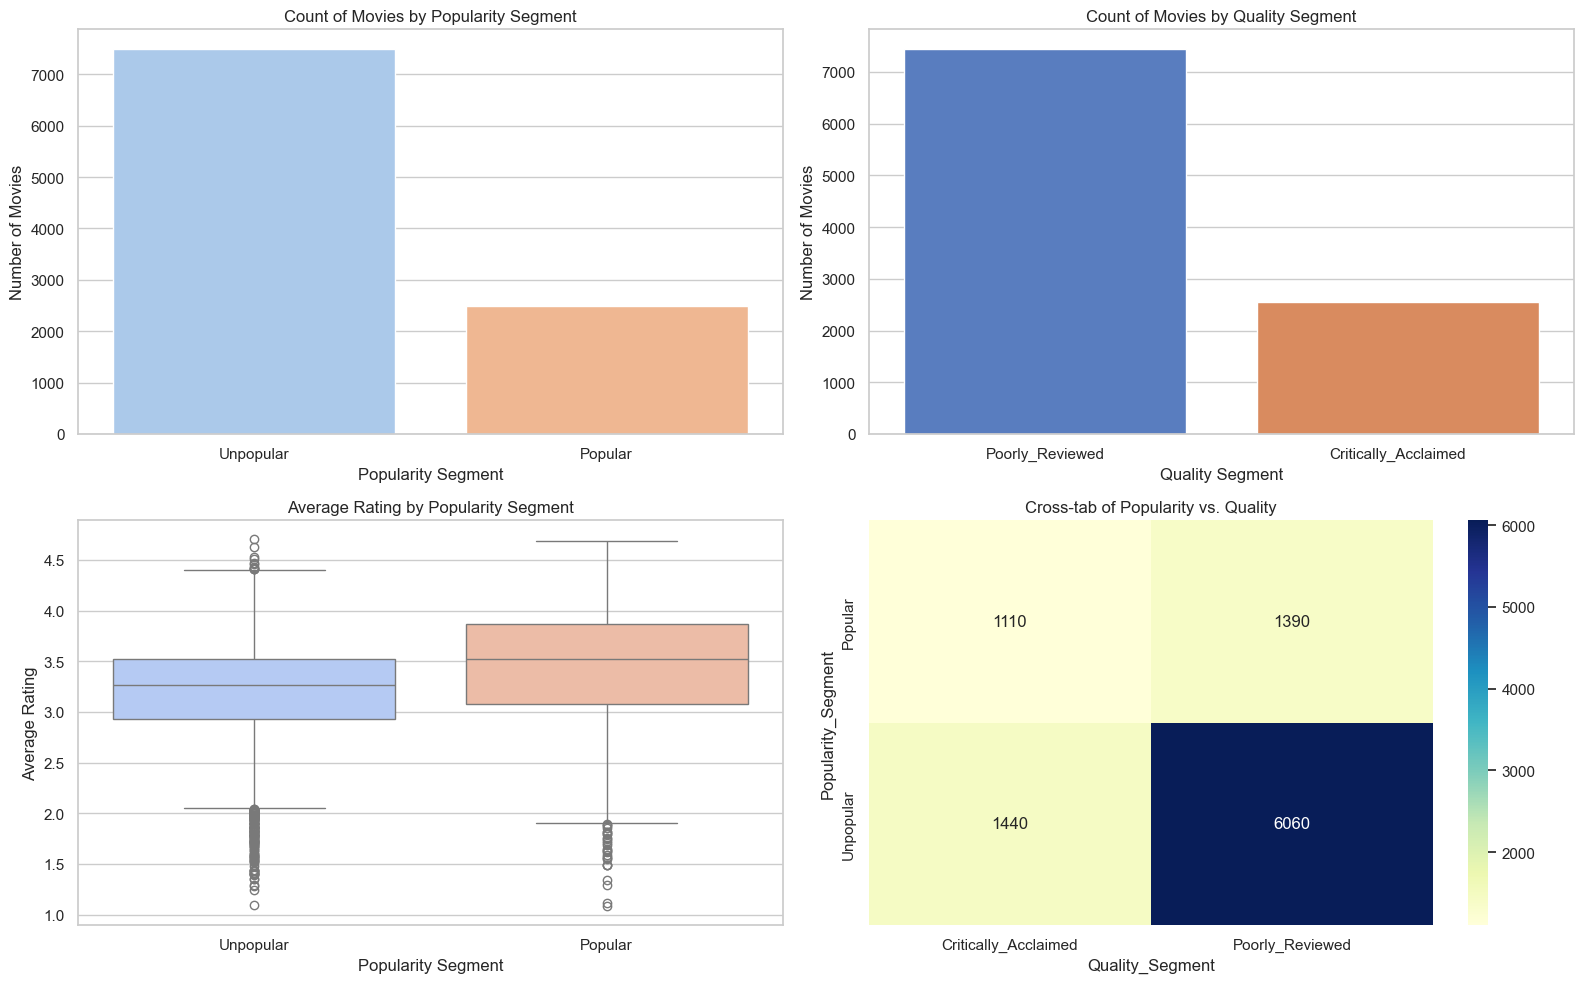

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

# Count of Movies by Popularity Segment
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Popularity_Segment', palette='pastel')
plt.title('Count of Movies by Popularity Segment')
plt.xlabel('Popularity Segment')
plt.ylabel('Number of Movies')

# Count of Movies by Quality Segment
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Quality_Segment', palette='muted')
plt.title('Count of Movies by Quality Segment')
plt.xlabel('Quality Segment')
plt.ylabel('Number of Movies')

# Boxplot: Average Rating by Popularity Segment
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Popularity_Segment', y='Average_rating', palette='coolwarm')
plt.title('Average Rating by Popularity Segment')
plt.xlabel('Popularity Segment')
plt.ylabel('Average Rating')

# Cross-tab Heatmap: Popularity vs Quality
plt.subplot(2, 2, 4)
ct = pd.crosstab(df['Popularity_Segment'], df['Quality_Segment'])
sns.heatmap(ct, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Cross-tab of Popularity vs. Quality')

plt.tight_layout()
plt.show()


## Runtime vs Average Rating – Does movie length affect rating?

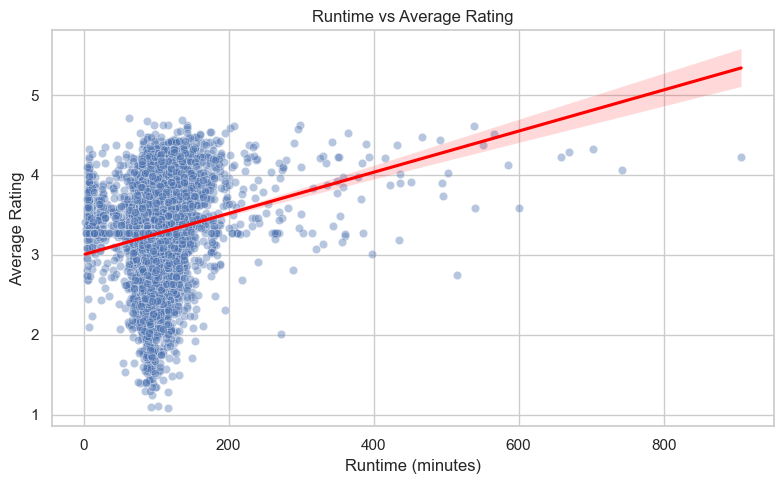

In [64]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Runtime', y='Average_rating', alpha=0.4)
sns.regplot(data=df, x='Runtime', y='Average_rating', scatter=False, color='red')
plt.title('Runtime vs Average Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()



##  Average Rating by Top 10 Languages – Regional performance

C:\Users\adity\AppData\Local\Temp\ipykernel_33400\1520286924.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lang_rating.values, y=lang_rating.index, palette='crest')


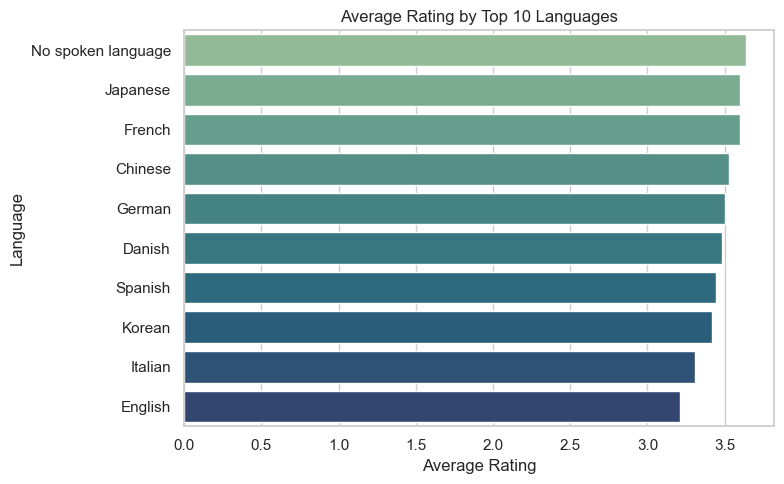

In [66]:
top_langs = df['Original_language'].value_counts().head(10).index
lang_rating = df[df['Original_language'].isin(top_langs)] \
                .groupby('Original_language')['Average_rating'].mean() \
                .sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=lang_rating.values, y=lang_rating.index, palette='crest')
plt.title('Average Rating by Top 10 Languages')
plt.xlabel('Average Rating')
plt.ylabel('Language')
plt.tight_layout()
plt.show()


## Watches vs Rating – Are popular films well-rated?

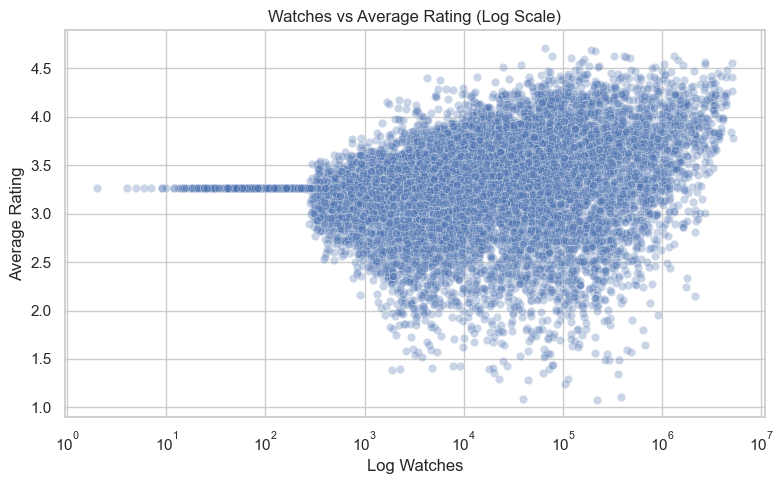

In [68]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Watches', y='Average_rating', alpha=0.3)
plt.xscale('log')
plt.title('Watches vs Average Rating (Log Scale)')
plt.xlabel('Log Watches')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


# Content-Based Movie Recommendation System Using NLP

## Import libraries

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
import string

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##  Preprocess Descriptions

In [73]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

df['clean_desc'] = df['Description'].apply(clean_text)


## TF-IDF Vectorization

In [75]:
tfidf = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['clean_desc'])


## Cosine Similarity

In [77]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


## Recommendation Function

In [79]:
def recommend_movies(title, num_recommendations=5):
    # Find index of the movie
    idx = df[df['Film_title'].str.lower() == title.lower()].index
    if len(idx) == 0:
        return "Movie not found."
    
    idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]
    
    recommended = df.iloc[[i[0] for i in sim_scores]][['Film_title', 'Average_rating']]
    return recommended


## FULLY OPERATIONAL MOVIE RECOMMENDATION SYSTEM !

In [81]:
recommend_movies("The Matrix")


,Film_title,Average_rating
2362,Hackers,3.26
8307,Commando,3.39
3486,The Matrix Reloaded,3.38
9512,Live Free or Die Hard,2.92
9513,The Matrix Resurrections,2.70


In [82]:
recommend_movies("The Dark Knight")


,Film_title,Average_rating
225,The Dark Knight Rises,3.77
1471,Batman Forever,2.51
772,Batman,3.62
2909,Batman: The Killing Joke,2.82
9124,The Batman,3.99


# Machine Learning Models ( Classification, Regression, Clustering)

In [84]:
# Convert list of genres to a single string per row
df['Genres'] = df['Genres'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)


In [85]:
!pip install imblearn


## Classification Model : Predict Rating Bands

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

df_model = df.copy()

# Ensure genres are lists
df_model['Genres'] = df_model['Genres'].apply(lambda x: x if isinstance(x, list) else [])

# Encode genres as multi-hot
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(df_model['Genres']), columns=mlb.classes_, index=df_model.index)
df_model = pd.concat([df_model, genres_encoded], axis=1)

# Encode target labels to numeric
le = LabelEncoder()
df_model['Quality_Label'] = le.fit_transform(df_model['Quality_Segment'])

# Features & target
feature_cols = ['Runtime', 'Watches', 'Likes', 'Fans', 'List_appearances'] + list(mlb.classes_)
X = df_model[feature_cols]
y = df_model['Quality_Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical columns
numeric_features = ['Runtime', 'Watches', 'Likes', 'Fans', 'List_appearances']
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features)
], remainder='passthrough')

# Pipeline
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Train
clf_pipeline.fit(X_train, y_train)

# Predict
y_pred = clf_pipeline.predict(X_test)

# Decoding predictions back to original labels
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Evaluate
print(confusion_matrix(y_test_labels, y_pred_labels))
print(classification_report(y_test_labels, y_pred_labels))


[[ 396  136]
 [  99 1369]]
                      precision    recall  f1-score   support

Critically_Acclaimed       0.80      0.74      0.77       532
     Poorly_Reviewed       0.91      0.93      0.92      1468

            accuracy                           0.88      2000
           macro avg       0.85      0.84      0.85      2000
        weighted avg       0.88      0.88      0.88      2000



##  Regression – Predict Average Rating

In [89]:
!pip install xgboost


In [90]:
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Convert genres to string 
df['Genres'] = df['Genres'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Features and target
X = df[['Runtime', 'Genres', 'Original_language', 'Director', 'Studios',
        'Watches', 'Likes', 'Fans', 'List_appearances']]

y = df['Average_rating']

# Columns
categorical_cols = ['Genres', 'Original_language', 'Director', 'Studios']
numerical_cols = ['Runtime', 'Watches', 'Likes', 'Fans', 'List_appearances']


# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Full pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Grid search parameters
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__subsample': [0.8, 1.0]
}

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearchCV with 3-fold CV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Best Parameters:", grid_search.best_params_)
print(f"Improved XGBoost R^2 Score: {r2}")
print(f"Improved XGBoost RMSE: {rmse}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'regressor__learning_rate': 0.2, 'regressor__max_depth': 7, 'regressor__n_estimators': 200, 'regressor__subsample': 0.8}
Improved XGBoost R^2 Score: 0.7979716090806575
Improved XGBoost RMSE: 0.2353014569430444


**Top 15 Feature Importances (XGBoost)**

<Figure size 1000x600 with 0 Axes>

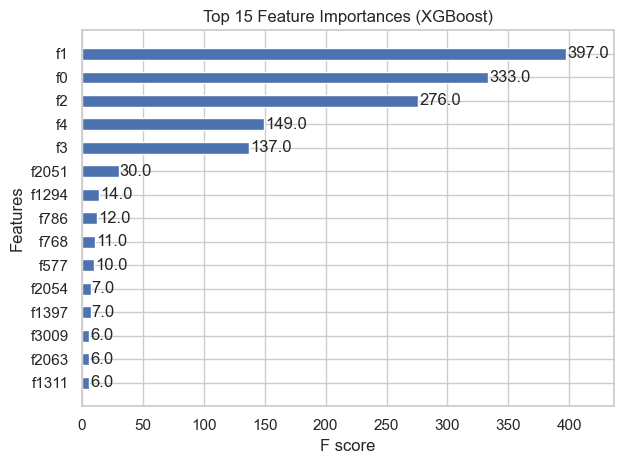

In [92]:
# Manually transforming the features
X_train_transformed = preprocessor.fit_transform(X_train)

# Trainong XGBoost on transformed data
from xgboost import XGBRegressor, plot_importance

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_transformed, y_train)

# Feature importances plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=15, height=0.5)
plt.title("Top 15 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


In [93]:
from sklearn.model_selection import cross_val_score
import numpy as np

# 5-fold cross-validation
cv_scores = cross_val_score(xgb_model, X_train_transformed, y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Mean CV R² Score:", np.mean(cv_scores))


Cross-Validation R² Scores: [0.776447   0.75336722 0.77411211 0.77756994 0.77336643]
Mean CV R² Score: 0.7709725415508442


## Regression: Actual vs. Predicted Rating

In [95]:
# Df for actual vs predicted ratings
predicted_rating_df = pd.DataFrame({
    'Actual_Average_Rating': y_test.values,
    'Predicted_Average_Rating': y_pred
})

# first 10 rows
predicted_rating_df.head(10)


,Actual_Average_Rating,Predicted_Average_Rating
0,3.42,3.066190
1,4.35,4.138627
2,3.73,3.809510
3,3.81,4.028441
4,3.69,3.645100
5,4.09,3.713751
6,3.35,3.490617
7,2.51,2.631384
8,2.98,2.952615
9,3.54,3.638750


## Classification: Actual vs. Predicted Quality Segment

In [97]:

# Df for comparison
predicted_quality_df = pd.DataFrame({
    'Actual_Quality_Segment': y_test_labels,
    'Predicted_Quality_Segment': y_pred_labels
})

# View first 10 rows
predicted_quality_df.head(10)


,Actual_Quality_Segment,Predicted_Quality_Segment
0,Poorly_Reviewed,Poorly_Reviewed
1,Critically_Acclaimed,Critically_Acclaimed
2,Critically_Acclaimed,Critically_Acclaimed
3,Critically_Acclaimed,Critically_Acclaimed
4,Critically_Acclaimed,Critically_Acclaimed
5,Critically_Acclaimed,Critically_Acclaimed
6,Poorly_Reviewed,Critically_Acclaimed
7,Poorly_Reviewed,Poorly_Reviewed
8,Poorly_Reviewed,Poorly_Reviewed
9,Poorly_Reviewed,Critically_Acclaimed


## Clustering –  group similar movies based on selected feature

**Features for Clustering**

In [100]:
clustering_features = df[['Average_rating', 'Runtime', 'Watches', 'Likes', 'Fans']]


**Scaling the Features**

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_cluster = scaler.fit_transform(clustering_features)


**KMeans Clustering**

In [104]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 **Analyzing Cluster Stats**

In [106]:
df.groupby('Cluster')[['Average_rating', 'Runtime', 'Watches', 'Likes', 'Fans']].mean()


,Average_rating,Runtime,Watches,Likes,Fans
Cluster,,,,,
0,3.660343,115.663100,1.303489e+05,3.150708e+04,961.385969
1,2.910075,91.661269,5.471439e+04,7.208985e+03,78.335581
2,3.803872,121.407692,1.642736e+06,4.533944e+05,16396.300000
3,4.158462,130.923077,3.418297e+06,1.377551e+06,87230.769231


**Visualize the Clusters**

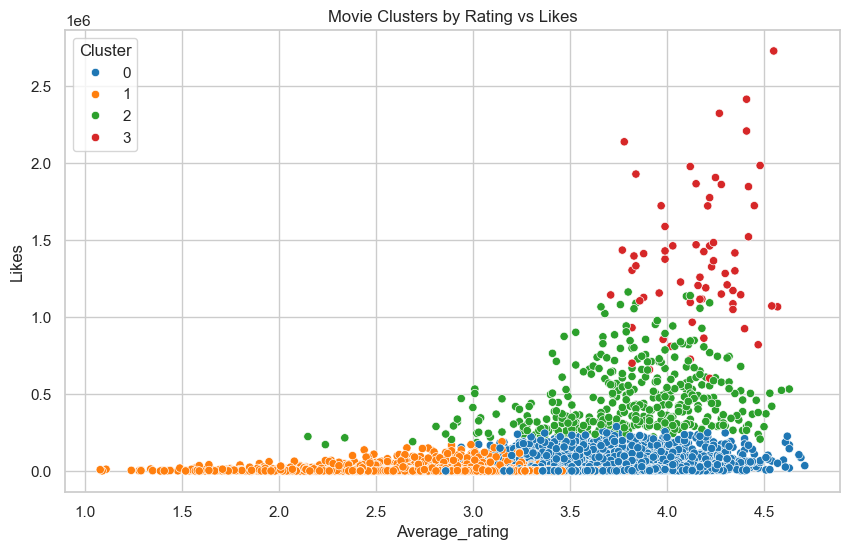

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Average_rating', y='Likes', hue='Cluster', palette='tab10')
plt.title("Movie Clusters by Rating vs Likes")
plt.show()


**Labelling clusters**

In [110]:
cluster_labels = {
    0: 'Moderate Hits',
    1: 'Low Performers',
    2: 'Popular Films',
    3: 'Blockbusters'
}
df['Cluster_Label'] = df['Cluster'].map(cluster_labels)


In [111]:
df[df['Cluster_Label'] == 'Blockbusters'][['Film_title', 'Average_rating', 'Likes', 'Fans']].head()


,Film_title,Average_rating,Likes,Fans
11,Get Out,4.15,1867622,33000
18,The Truman Show,4.22,1777004,71000
21,Whiplash,4.42,1848733,154000
26,Django Unchained,4.30,1284212,53000
40,Donnie Darko,3.98,855547,79000


## Importing CSVs

In [113]:
df.to_csv("clean_movies_master.csv", index=False)


In [114]:
df_exploded = df.copy()
df_exploded['Genres'] = df_exploded['Genres'].apply(lambda x: x if isinstance(x, list) else x.split(', '))
df_exploded = df_exploded.explode('Genres')
df_exploded.to_csv("genre_exploded.csv", index=False)


In [115]:
top_15_engagement = df[['Film_title', 'Watches', 'Likes', 'Fans']].sort_values(by='Watches', ascending=False).head(15)
top_15_engagement.to_csv("top15_films_by_engagement.csv", index=False)


In [116]:
top_director_ratings.to_csv("top_directors_by_avg_rating.csv")


In [117]:
top_studio_ratings.to_csv("top_studios_by_avg_rating.csv")


In [118]:
predicted_quality_df.to_csv("predicted_quality_segments.csv", index=False)


In [119]:
predicted_rating_df.to_csv("predicted_average_ratings.csv", index=False)


In [120]:
df.to_csv("clustered_movie_segments.csv", index=False)


In [121]:
cosine_df = pd.DataFrame(cosine_sim)
cosine_df.to_csv("movie_similarity_matrix.csv", index=False)


## Sentiment Analysis (Based on Movie Descriptions)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


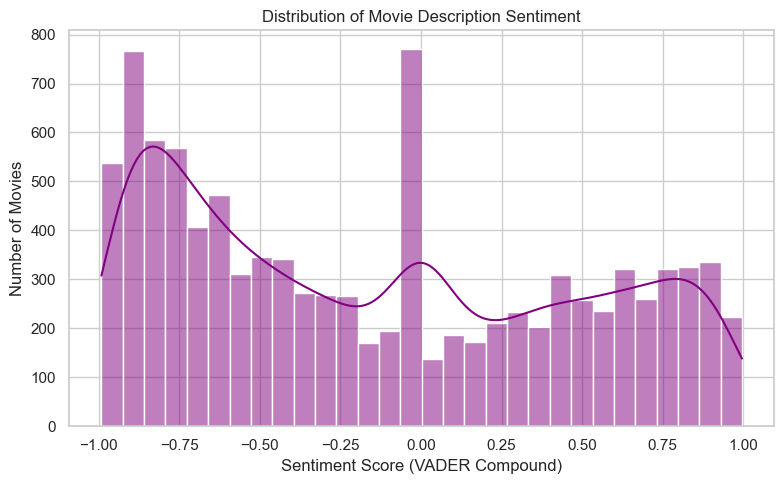

,Film_title,Average_rating,Sentiment,Description
7740,Escape to Witch Mountain,3.11,0.2732,Tia and Tony are two orphaned youngsters with ...
9741,The Champ,3.40,0.9260,"Billy used to be a great boxer, but he's settl..."
2875,Sugar,3.65,-0.7311,"Like many young men in the Dominican Republic,..."
3109,The Monkey's Uncle,3.10,-0.2023,College whiz-kid Merlin Jones concocts a metho...
3980,The Detective,3.25,-0.6908,Police detective Joe Leland investigates the m...


In [123]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initializing sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Applying sentiment scoring
df['Sentiment'] = df['Description'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Checking distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Sentiment'], bins=30, kde=True, color='purple')
plt.title("Distribution of Movie Description Sentiment")
plt.xlabel("Sentiment Score (VADER Compound)")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()

# Examples
df[['Film_title', 'Average_rating', 'Sentiment', 'Description']].sample(5)


**Sentiment vs Average Rating**

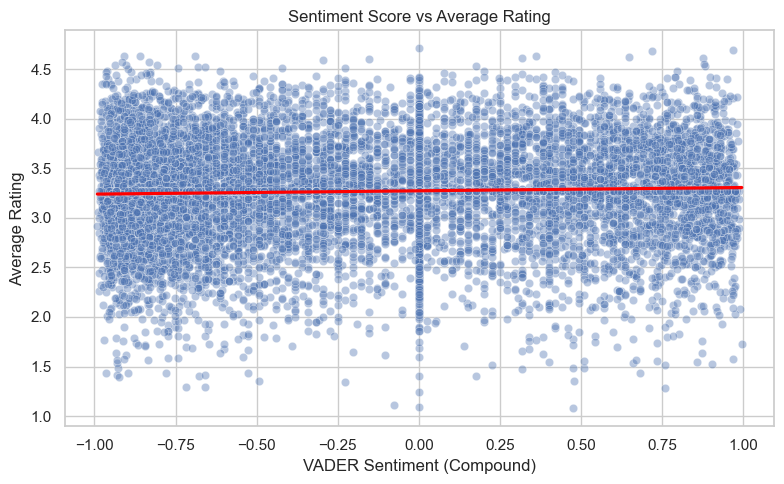

In [125]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Sentiment', y='Average_rating', alpha=0.4)
sns.regplot(data=df, x='Sentiment', y='Average_rating', scatter=False, color='red')
plt.title("Sentiment Score vs Average Rating")
plt.xlabel("VADER Sentiment (Compound)")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()


**Group movies by sentiment bucket**

C:\Users\adity\AppData\Local\Temp\ipykernel_33400\2247979639.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment_Label', palette='Set2', order=['Negative', 'Neutral', 'Positive'])


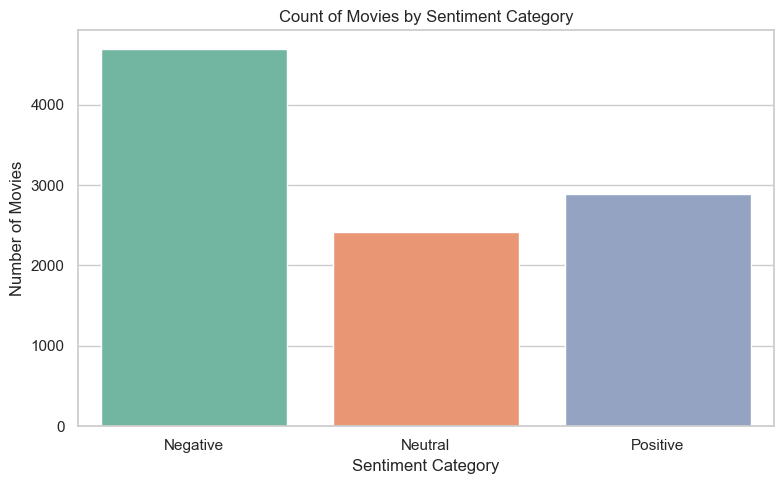

In [127]:
def sentiment_category(score):
    if score >= 0.3:
        return 'Positive'
    elif score <= -0.3:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Label'] = df['Sentiment'].apply(sentiment_category)

# Countplot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment_Label', palette='Set2', order=['Negative', 'Neutral', 'Positive'])
plt.title("Count of Movies by Sentiment Category")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()


**Average Rating by Sentiment Group**

C:\Users\adity\AppData\Local\Temp\ipykernel_33400\2799589933.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_sentiment.index, y=avg_rating_by_sentiment.values, palette='coolwarm')


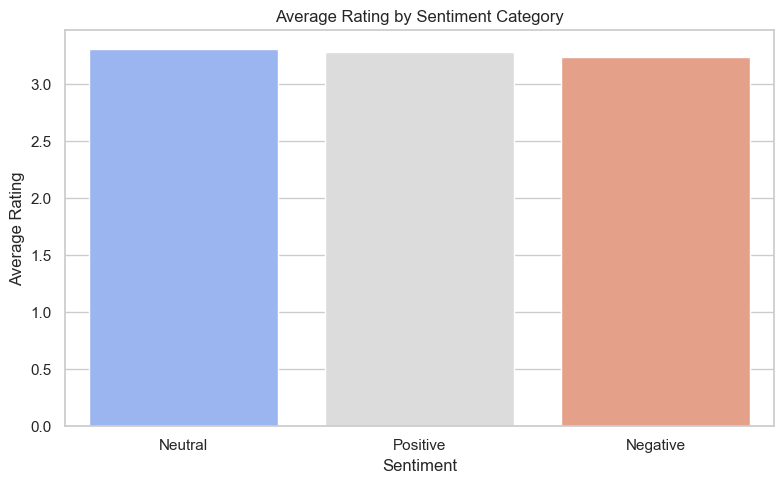

In [129]:
avg_rating_by_sentiment = df.groupby('Sentiment_Label')['Average_rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_rating_by_sentiment.index, y=avg_rating_by_sentiment.values, palette='coolwarm')
plt.title("Average Rating by Sentiment Category")
plt.xlabel("Sentiment")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()


C:\Users\adity\AppData\Local\Temp\ipykernel_33400\3476406514.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_sentiment.values, y=cluster_sentiment.index, palette='coolwarm')


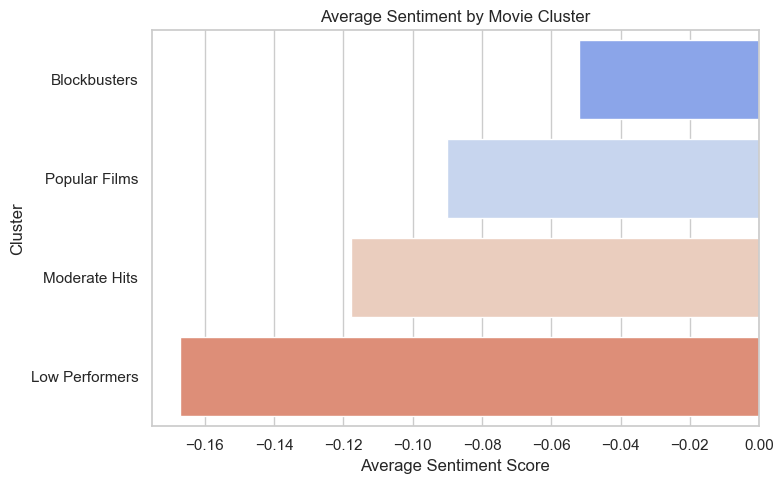

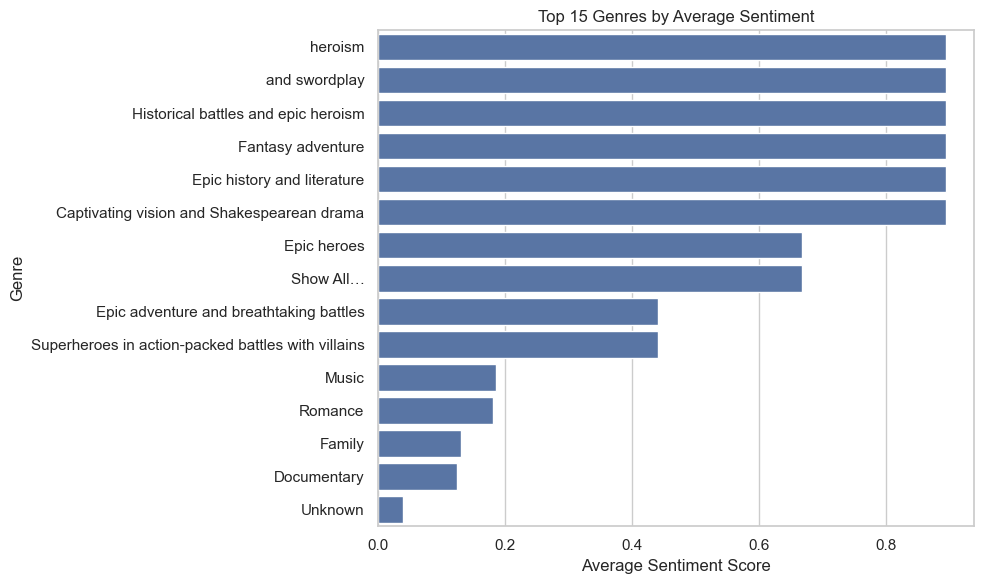

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Average Sentiment by Cluster_Label
plt.figure(figsize=(8, 5))
cluster_sentiment = df.groupby('Cluster_Label')['Sentiment'].mean().sort_values(ascending=False)
sns.barplot(x=cluster_sentiment.values, y=cluster_sentiment.index, palette='coolwarm')
plt.title("Average Sentiment by Movie Cluster")
plt.xlabel("Average Sentiment Score")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


# Plot 2: Average Sentiment by Genre (Top 15)
df['Genres'] = df['Genres'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Explode to allow genre-level grouping
df_exploded_genres = df.explode('Genres')

# Computing average sentiment
genre_sentiment = df_exploded_genres.groupby('Genres')['Sentiment'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_sentiment.values, y=genre_sentiment.index)
plt.title("Top 15 Genres by Average Sentiment")
plt.xlabel("Average Sentiment Score")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


## Generating Sentiment Analysis CSVs

In [132]:
# Sentiment (VADER compound), Cluster, Cluster_Label
cluster_sentiment = df.groupby(['Cluster', 'Cluster_Label'])['Sentiment'].mean().reset_index()
cluster_sentiment.to_csv('cluster_sentiment.csv', index=False)


In [133]:
df['Genres'] = df['Genres'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
df_exploded_genres = df.explode('Genres')

# Grouping and average sentiment
genre_sentiment = df_exploded_genres.groupby('Genres')['Sentiment'].mean().reset_index()
genre_sentiment = genre_sentiment.sort_values(by='Sentiment', ascending=False)

# Save
genre_sentiment.to_csv('genre_sentiment.csv', index=False)


In [134]:
# Create flat top-5 recommendations per film
top_n = 5
recommendations = []

titles = df['Film_title'].values

for idx, title in enumerate(titles):
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # Skip self (index 0)
    
    for sim_idx, score in sim_scores:
        recommendations.append({
            'Film_title': title,
            'Recommended_Film': titles[sim_idx],
            'Similarity_Score': score
        })

rec_df = pd.DataFrame(recommendations)
rec_df.to_csv("top5_movie_recommendations.csv", index=False)


## High Impact Business Questions

## Are some genres more polarizing than others?

**We use the standard deviation of average ratings per genre to measure polarization.**

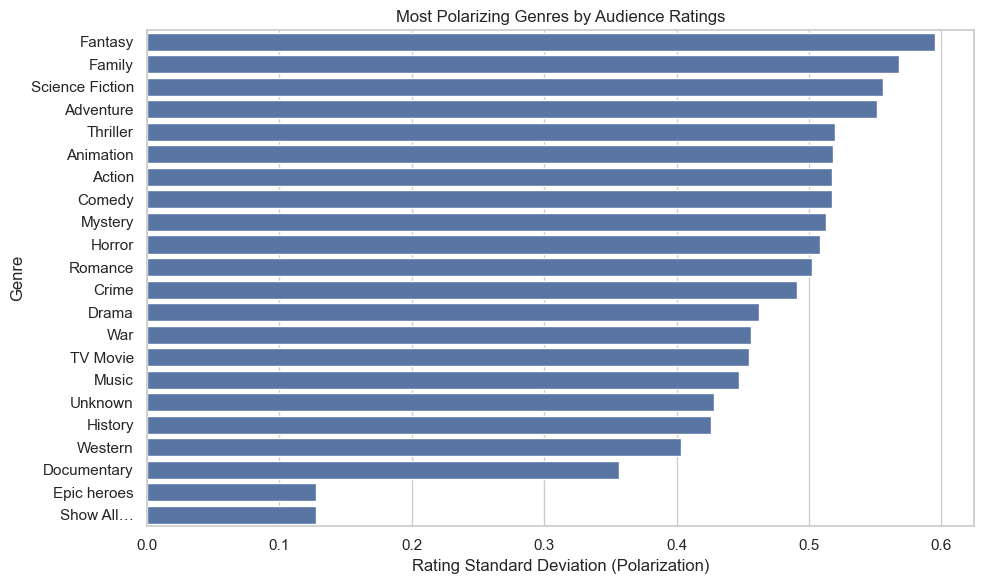

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load 
df = pd.read_csv('clean_movies_master.csv')

df['Genres'] = df['Genres'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
df_exploded = df.explode('Genres')

# Standard deviation of rating per genre
genre_polarization = df_exploded.groupby('Genres')['Average_rating'].std().sort_values(ascending=False).dropna()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_polarization.values, y=genre_polarization.index)
plt.xlabel('Rating Standard Deviation (Polarization)')
plt.ylabel('Genre')
plt.title('Most Polarizing Genres by Audience Ratings')
plt.tight_layout()
plt.show()


## Which underrepresented languages or studios show high average ratings?

**This helps Letterboxd spot hidden gems and opportunities for market expansion, especially for promoting overlooked international or indie films.**

C:\Users\adity\AppData\Local\Temp\ipykernel_33400\843305467.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lang_rating.values, y=lang_rating.index, palette='viridis')


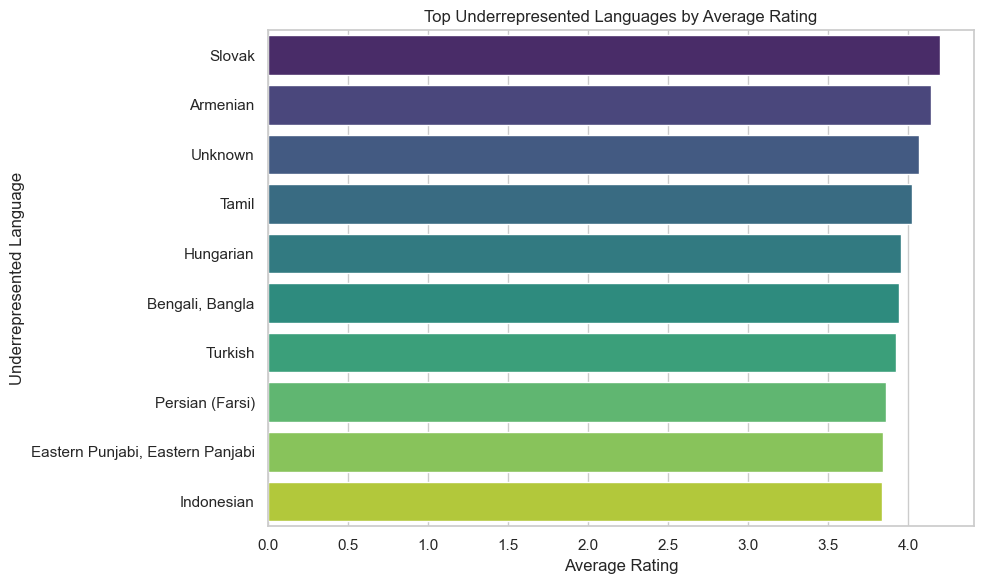

In [220]:
lang_counts = df['Original_language'].value_counts()

# Filter underrepresented languages (less than 100 films)
underrepresented_langs = lang_counts[lang_counts < 100].index

# Filter Df
df_under_langs = df[df['Original_language'].isin(underrepresented_langs)]

# Group and calculate average rating
lang_rating = df_under_langs.groupby('Original_language')['Average_rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=lang_rating.values, y=lang_rating.index, palette='viridis')
plt.xlabel("Average Rating")
plt.ylabel("Underrepresented Language")
plt.title("Top Underrepresented Languages by Average Rating")
plt.tight_layout()
plt.show()

## What features predict high-quality (Critically Acclaimed) films?

**This gives Letterboxd a data-driven understanding of what characteristics tend to align with critically successful films — helpful for acquisition, marketing, and content partnerships.**

<Figure size 1000x600 with 0 Axes>

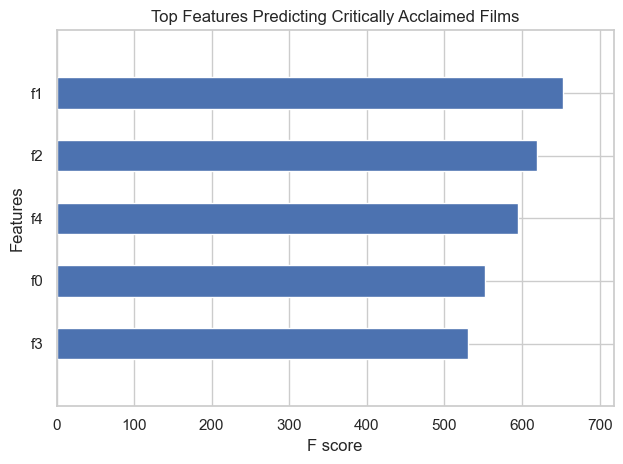

In [223]:
from xgboost import plot_importance

xgb_model = clf_pipeline.named_steps['classifier']
feature_names = clf_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Top features
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight', max_num_features=15, height=0.5, show_values=False)
plt.title("Top Features Predicting Critically Acclaimed Films")
plt.tight_layout()
plt.show()


## Can we predict a film's average rating before it’s released?

**We've already trained an XGBoostRegressor model to predict Average_rating using metadata like runtime, genre, language, director, studio, and engagement.**

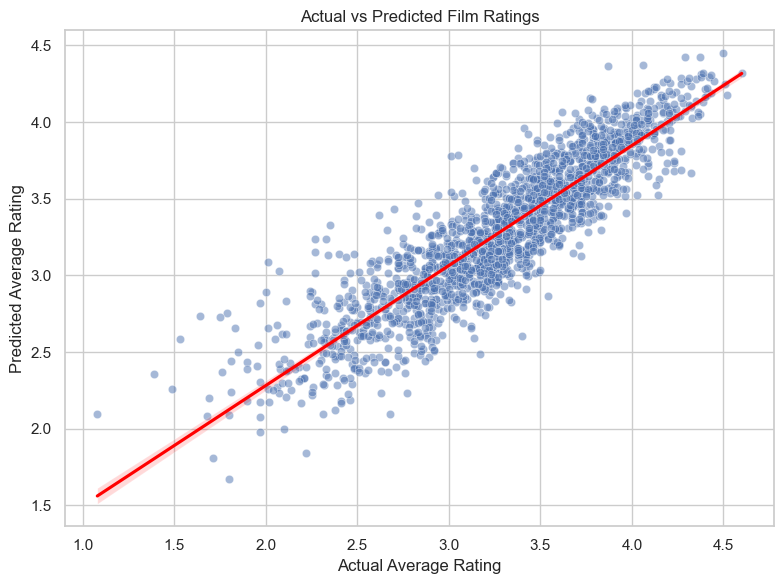

In [231]:
# Scatterplot of actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=predicted_rating_df,
    x='Actual_Average_Rating',
    y='Predicted_Average_Rating',
    alpha=0.5
)
sns.regplot(
    data=predicted_rating_df,
    x='Actual_Average_Rating',
    y='Predicted_Average_Rating',
    scatter=False,
    color='red'
)
plt.title("Actual vs Predicted Film Ratings")
plt.xlabel("Actual Average Rating")
plt.ylabel("Predicted Average Rating")
plt.tight_layout()
plt.show()

## Can we improve user retention through better recommendations?

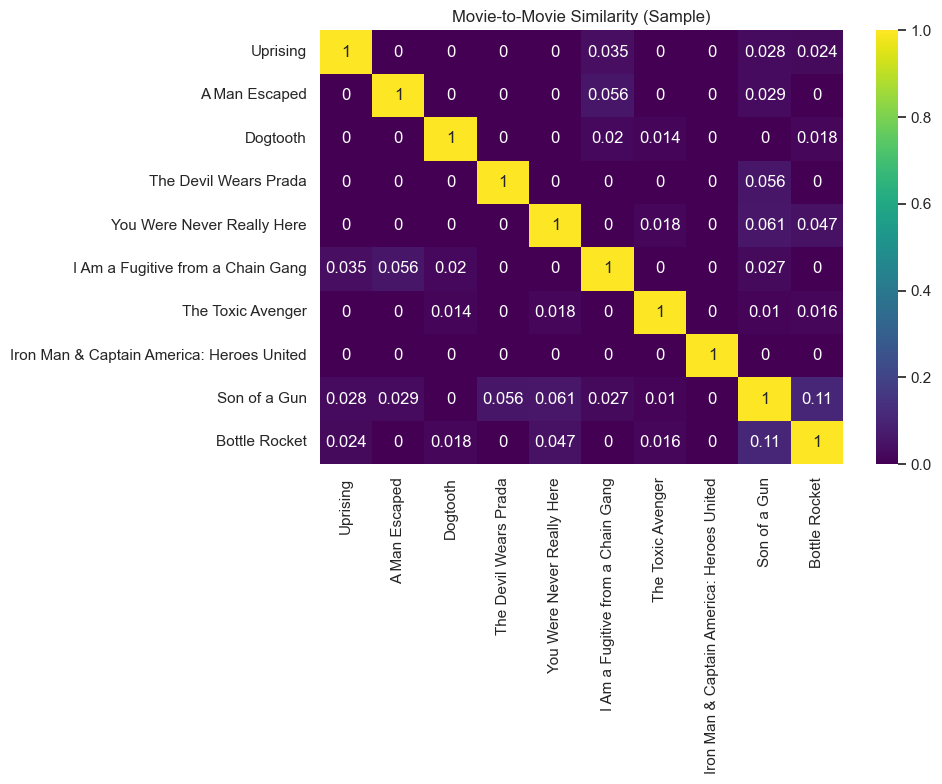

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample 10 movies and similarity heatmap
sample_titles = df['Film_title'].sample(10, random_state=42).tolist()
sample_indices = df[df['Film_title'].isin(sample_titles)].index
sample_sim = cosine_sim[np.ix_(sample_indices, sample_indices)]

plt.figure(figsize=(10, 8))
sns.heatmap(sample_sim, xticklabels=sample_titles, yticklabels=sample_titles, cmap='viridis', annot=True)
plt.title("Movie-to-Movie Similarity (Sample)")
plt.tight_layout()
plt.show()


## What are the characteristics of blockbuster vs poorly performing films?

**Already clustered movies using KMeans on:Average_rating, Watches, Likes, Fans, Runtime**

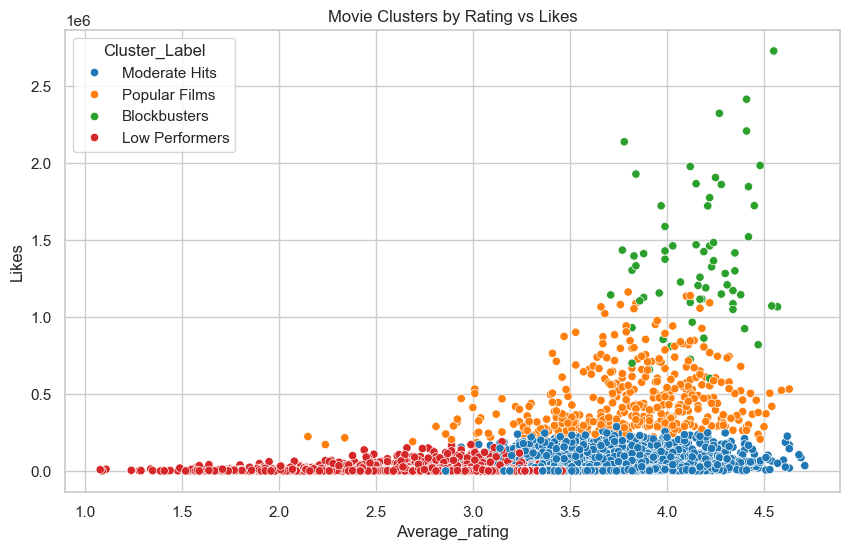

In [237]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Average_rating', y='Likes', hue='Cluster_Label', palette='tab10')
plt.title("Movie Clusters by Rating vs Likes")
plt.show()


In [243]:
df.groupby('Cluster_Label')[['Average_rating', 'Watches', 'Likes', 'Fans', 'Runtime']].mean()


,Average_rating,Watches,Likes,Fans,Runtime
Cluster_Label,,,,,
Blockbusters,4.158462,3.418297e+06,1.377551e+06,87230.769231,130.923077
Low Performers,2.910075,5.471439e+04,7.208985e+03,78.335581,91.661269
Moderate Hits,3.660343,1.303489e+05,3.150708e+04,961.385969,115.663100
Popular Films,3.803872,1.642736e+06,4.533944e+05,16396.300000,121.407692


Blockbusters have high everything: rating + engagement

Low Performers: low ratings & low fans

Moderate Hits: okay engagement, lower rating



## Which genres consistently receive higher audience sentiment?

**Using VADER sentiment scores from descriptions to uncover**

**In PowerBI**

## What Genres Are Underserved but High-Quality?

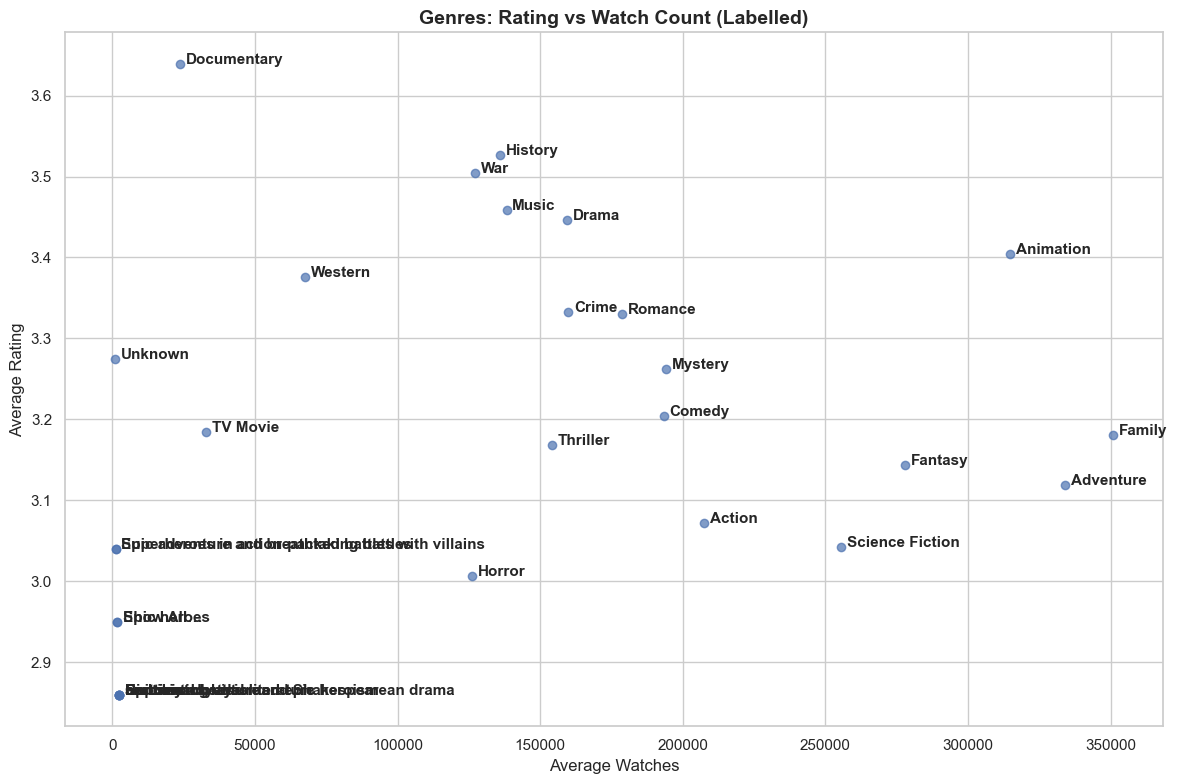

In [271]:
# Group by genre
genre_visibility = df.explode('Genres').groupby('Genres').agg({
    'Average_rating': 'mean',
    'Watches': 'mean'
}).reset_index()

# Sorting by average rating
genre_visibility.sort_values(by='Average_rating', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(genre_visibility['Watches'], genre_visibility['Average_rating'], alpha=0.7)

for i in range(len(genre_visibility)):
    plt.text(
        genre_visibility['Watches'].iloc[i] + 2000,  # small shift right
        genre_visibility['Average_rating'].iloc[i],
        genre_visibility['Genres'].iloc[i],
        fontsize=11,
        weight='bold'
    )

plt.xlabel('Average Watches')
plt.ylabel('Average Rating')
plt.title('Genres: Rating vs Watch Count (Labelled)', fontsize=14, weight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()


## Which genres combine high sentiment AND low visibility?

C:\Users\adity\AppData\Local\Temp\ipykernel_33400\2573881207.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


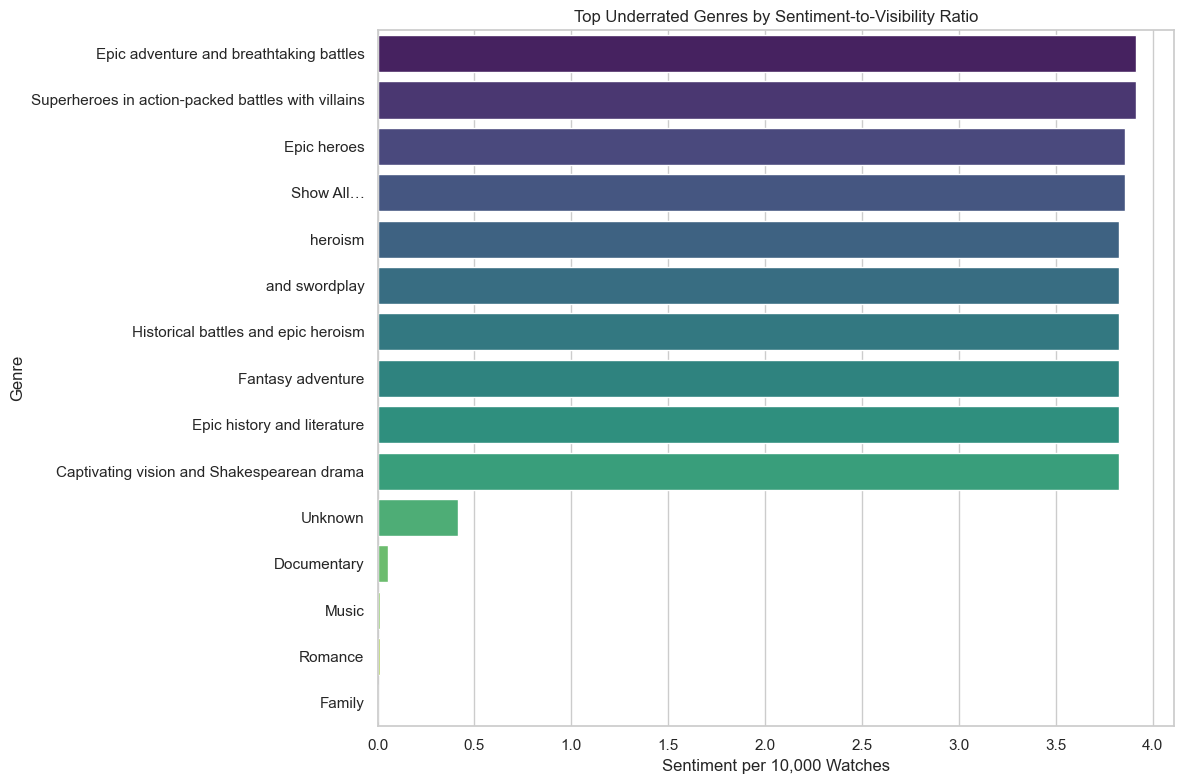

In [279]:
# Add a new ratio column
merged_genre['Sentiment_per_10k_Watches'] = merged_genre['Sentiment'] / (merged_genre['Average_Watches'] / 10000)

# Sort by ratio
top_underrated = merged_genre.sort_values(by='Sentiment_per_10k_Watches', ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_underrated,
    y='Genres',
    x='Sentiment_per_10k_Watches',
    palette='viridis'
)
plt.title('Top Underrated Genres by Sentiment-to-Visibility Ratio')
plt.xlabel('Sentiment per 10,000 Watches')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


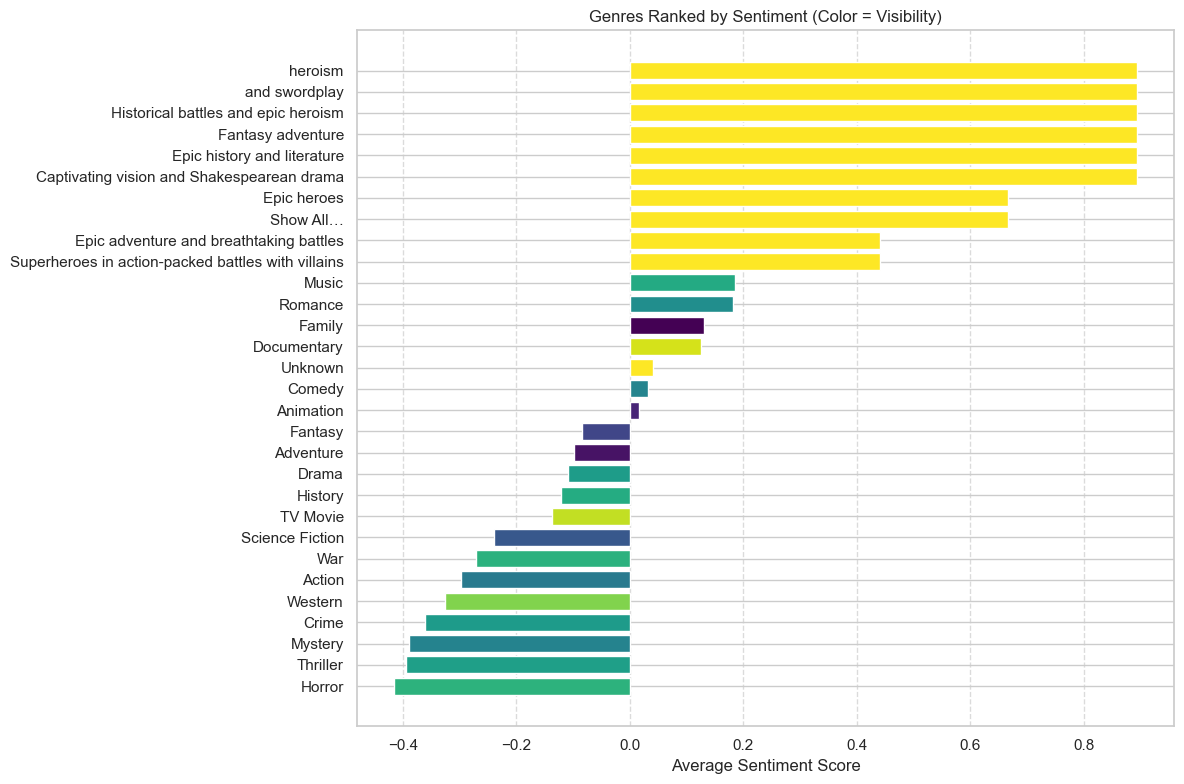

In [281]:
watch_norm = (merged_genre['Average_Watches'] - merged_genre['Average_Watches'].min()) / \
             (merged_genre['Average_Watches'].max() - merged_genre['Average_Watches'].min())

# Sort genres by sentiment
merged_genre_sorted = merged_genre.sort_values(by='Sentiment', ascending=True)

# Plot
plt.figure(figsize=(12, 8))
plt.barh(
    merged_genre_sorted['Genres'],
    merged_genre_sorted['Sentiment'],
    color=plt.cm.viridis(1 - watch_norm.loc[merged_genre_sorted.index])  # darker = lower visibility
)

plt.xlabel("Average Sentiment Score")
plt.title("Genres Ranked by Sentiment (Color = Visibility)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()